In [1]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import glob
import os
import re
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

In [3]:
file_dir_list = os.listdir()
# file_dir_list = [i for i in file_dir_list if not ( i.startswith('.') or i.endswith('.ipynb') or i.endswith('.xls') or i.endswith('.txt'))]
file_dir_list = [i for i in file_dir_list if re.search(r'(\d+-\d+)',i) ]
file_dir_list

['20180510-1',
 '20180604-1',
 '20180704-2',
 '20180709-1',
 '20180716-1',
 '20180718-1',
 '20180730-1',
 '20180910-1',
 '20180917-1',
 '20181011-1',
 '20181119-1',
 '20181210-2',
 '20190117-1',
 '20190125-1',
 '20190220-1',
 '20190312-1',
 '20190410-2',
 '20190425-1',
 '20190509-1',
 '20190529-2',
 '20190604-1',
 '20190704-1']

In [4]:
#获取当前文件夹下的所有目录及其目录里的文件

file_list = []
for i in file_dir_list:
    file_list1 = glob.glob('.\%s\*.txt'%i)
    file_list.extend(file_list1)
file_list

['.\\20180510-1\\res-IonXpress_055_rawlib.bam_grepCHR16_20w.txt',
 '.\\20180510-1\\res-IonXpress_057_rawlib.bam_grepCHR16_20w.txt',
 '.\\20180510-1\\res-IonXpress_060_rawlib.bam_grepCHR16_20w.txt',
 '.\\20180604-1\\result-IonXpress_005_rawlib.bam.txt',
 '.\\20180604-1\\result-IonXpress_006_rawlib.bam.txt',
 '.\\20180604-1\\result-IonXpress_009_rawlib.bam.txt',
 '.\\20180604-1\\result-IonXpress_010_rawlib.bam.txt',
 '.\\20180604-1\\result-IonXpress_011_rawlib.bam.txt',
 '.\\20180604-1\\result-IonXpress_078_rawlib.bam.txt',
 '.\\20180604-1\\result-IonXpress_079_rawlib.bam.txt',
 '.\\20180604-1\\result-IonXpress_080_rawlib.bam.txt',
 '.\\20180604-1\\result-IonXpress_081_rawlib.bam.txt',
 '.\\20180604-1\\result-IonXpress_082_rawlib.bam.txt',
 '.\\20180704-2\\result-IonXpress_024_rawlib.bam.txt',
 '.\\20180704-2\\result-IonXpress_027_rawlib.bam.txt',
 '.\\20180704-2\\result-IonXpress_031_rawlib.bam.txt',
 '.\\20180704-2\\result-IonXpress_035_rawlib.bam.txt',
 '.\\20180704-2\\result-IonXpres

In [5]:
len(file_list)

88

In [6]:
#根据 barcode和日期 得到 对应barcode的PGD的结果
pgd_data = pd.read_excel('res.xls')[[3,'PGD结果','日期']].fillna(value=' ')
pgd_data.head()

,3,PGD结果,日期
0,16,未匹配到,
1,接头,未匹配到,
2,81,未匹配到,
3,82,--SEA/ α α,20190117-1
4,83,未匹配到,


In [7]:
#根据 barcode和日期 得到2018年 对应barcode的PGD的结果
pgd_data2 = pd.read_excel('res-2.xls')[[3,'PGD结果','日期']].fillna(value=' ')
pgd_data2.head()

,3,PGD结果,日期
0,22,未匹配到,
1,接头,未匹配到,
2,45,未匹配到,
3,46,未匹配到,
4,47,未匹配到,


In [8]:
#方法一
results1 = pgd_data[[3,'PGD结果','日期']][(pgd_data['日期'] != ' ')].copy()
results1.head()

,3,PGD结果,日期
3,82,--SEA/ α α,20190117-1
40,90,αα/αα,20190125-1
41,91,--SEA/--SEA,20190125-1
42,92,--SEA/--SEA,20190125-1
43,93,--SEA/ α α,20190125-1


In [9]:
results2 = pgd_data2[[3,'PGD结果','日期']][(pgd_data2['日期'] != ' ')].copy()
results2.head()

,3,PGD结果,日期
135,55,α α / α α,20180510-1
137,57,α α / α α,20180510-1
140,60,--SEA/ α α,20180510-1
169,78,--SEA/ α α,20180604-1
170,79,α α / α α,20180604-1


In [10]:
results = pd.concat([results2,results1],join='outer',ignore_index=True)
results.head()

,3,PGD结果,日期
0,55,α α / α α,20180510-1
1,57,α α / α α,20180510-1
2,60,--SEA/ α α,20180510-1
3,78,--SEA/ α α,20180604-1
4,79,α α / α α,20180604-1


In [12]:
# # df = df[df['GOODREASON'].isin(['quality', 'cheap'])]
# kind1 = results[results['PGD结果'].isin(['αα/αα','α α / α α','αα /αα'])]
# kind1

In [25]:
# kind1_list = kind1['日期'].values
# kind1_list

In [23]:
# sample_kind1_list = [ i for i in file_list if re.search(r'\\(\d+-\d+)\\',i).groups()[0] in kind1_list]
# sample_kind1_list

In [11]:
results['PGD结果'].unique()

array(['α α / α α', '--SEA/ α α', '--SEA/--SEA', 'αα/αα', 'αWSα/--SEA',
       'αα /αα', ' --SEA/-α3.7', 'ααWS/-α3.7', ' -α4.2/αα', '--SEA /αα',
       'αα/αWSα', ' -α3.7/αα', 'αWSα/αα', 'αQSα/αα？', ' --SEA/αCSα'],
      dtype=object)

In [12]:
targets_dict = {'α α / α α':2,'αα/αα':2,'αα /αα':2,' --SEA/-α3.7':3,'--SEA/ α α':4,'--SEA/--SEA':5,'αWSα/--SEA':4,'ααWS/-α3.7':6, ' -α4.2/αα':7,'--SEA /αα':4,'αα/αWSα':2,' -α3.7/αα':6,'αWSα/αα':2,'αQSα/αα？':2,' --SEA/αCSα':4}
targets_dict

{'α α / α α': 2,
 'αα/αα': 2,
 'αα /αα': 2,
 ' --SEA/-α3.7': 3,
 '--SEA/ α α': 4,
 '--SEA/--SEA': 5,
 'αWSα/--SEA': 4,
 'ααWS/-α3.7': 6,
 ' -α4.2/αα': 7,
 '--SEA /αα': 4,
 'αα/αWSα': 2,
 ' -α3.7/αα': 6,
 'αWSα/αα': 2,
 'αQSα/αα？': 2,
 ' --SEA/αCSα': 4}

In [93]:
# targets_dict = {'α α / α α':1,'αα/αα':1,'αα /αα':1,' --SEA/-α3.7':3,'--SEA/ α α':2,'--SEA/--SEA':3,'αWSα/--SEA':2,'ααWS/-α3.7':1, ' -α4.2/αα':1,'--SEA /αα':2,'αα/αWSα':1,' -α3.7/αα':1,'αWSα/αα':1,'αQSα/αα？':1,' --SEA/αCSα':2}
# targets_dict

In [13]:
#获取映射的PGD数字结果
target_dict_num = {}
for i in range(len(results.index.values)):
    date = results.loc[i]['日期']
    barcode = results.loc[i][3]
    pgd_res = results.loc[i]['PGD结果']
    target_dict_num['sample_%s_%.3d'%(date,barcode)] = targets_dict[pgd_res]
    target_dict_num['sample_%s_%.3d'%(date,barcode)] = targets_dict[pgd_res]
target_dict_num

{'sample_20180510-1_055': 2,
 'sample_20180510-1_057': 2,
 'sample_20180510-1_060': 4,
 'sample_20180604-1_078': 4,
 'sample_20180604-1_079': 2,
 'sample_20180604-1_080': 4,
 'sample_20180604-1_081': 5,
 'sample_20180604-1_082': 5,
 'sample_20180604-1_005': 2,
 'sample_20180604-1_006': 2,
 'sample_20180604-1_009': 4,
 'sample_20180604-1_010': 4,
 'sample_20180604-1_011': 4,
 'sample_20180704-2_024': 4,
 'sample_20180704-2_027': 2,
 'sample_20180704-2_031': 4,
 'sample_20180704-2_035': 4,
 'sample_20180704-2_036': 4,
 'sample_20180709-1_059': 2,
 'sample_20180716-1_039': 3,
 'sample_20180716-1_040': 3,
 'sample_20180718-1_047': 2,
 'sample_20180718-1_048': 4,
 'sample_20180718-1_049': 4,
 'sample_20180718-1_050': 4,
 'sample_20180718-1_051': 2,
 'sample_20180718-1_052': 4,
 'sample_20180730-1_090': 6,
 'sample_20180910-1_004': 7,
 'sample_20180910-1_005': 2,
 'sample_20180917-1_022': 4,
 'sample_20180917-1_023': 4,
 'sample_20180917-1_026': 2,
 'sample_20181011-1_033': 4,
 'sample_20181

In [14]:
#获取映射的PGD数字结果
target_dict_pgd = {}
for i in range(len(results.index.values)):
    date = results.loc[i]['日期']
    barcode = results.loc[i][3]
    pgd_res = results.loc[i]['PGD结果']
    target_dict_pgd['sample_%s_%.3d'%(date,barcode)] = targets_dict[pgd_res]
    target_dict_pgd['sample_%s_%.3d'%(date,barcode)] = pgd_res
target_dict_pgd

{'sample_20180510-1_055': 'α α / α α',
 'sample_20180510-1_057': 'α α / α α',
 'sample_20180510-1_060': '--SEA/ α α',
 'sample_20180604-1_078': '--SEA/ α α',
 'sample_20180604-1_079': 'α α / α α',
 'sample_20180604-1_080': '--SEA/ α α',
 'sample_20180604-1_081': '--SEA/--SEA',
 'sample_20180604-1_082': '--SEA/--SEA',
 'sample_20180604-1_005': 'αα/αα',
 'sample_20180604-1_006': 'αα/αα',
 'sample_20180604-1_009': 'αWSα/--SEA',
 'sample_20180604-1_010': 'αWSα/--SEA',
 'sample_20180604-1_011': 'αWSα/--SEA',
 'sample_20180704-2_024': '--SEA/ α α',
 'sample_20180704-2_027': 'αα/αα',
 'sample_20180704-2_031': '--SEA/ α α',
 'sample_20180704-2_035': '--SEA/ α α',
 'sample_20180704-2_036': '--SEA/ α α',
 'sample_20180709-1_059': 'αα /αα',
 'sample_20180716-1_039': ' --SEA/-α3.7',
 'sample_20180716-1_040': ' --SEA/-α3.7',
 'sample_20180718-1_047': 'αα/αα',
 'sample_20180718-1_048': '--SEA/ α α',
 'sample_20180718-1_049': '--SEA/ α α',
 'sample_20180718-1_050': '--SEA/ α α',
 'sample_20180718-1_0

In [92]:
# 建立样本target映射函数
def myindex(arg):
    return target_dict_num.get(arg)

In [15]:
# 创建深度模板区间
temp_Position_range = np.arange(71277,336702)
temp_deep_range = np.arange(0,265425)
template_df = DataFrame(index=temp_Position_range)
template_df['template_sample']=temp_deep_range
template_df.head()

,template_sample
71277,0
71278,1
71279,2
71280,3
71281,4


In [16]:
%%time
#对之前的级联每个样本做优化，极大幅度提高了运行速度，合并所有样本到模板,并计算运行时间，
merge_res = template_df.copy()
for i in file_list:
#     '.\\20190117-1\\result-IonXpress_082_rawlib.bam.txt',
    dateX = i.split('\\')[1]
    barcodeExp = i.split('\\')[2]
    barcodeX = re.search(r'_(\d+)_',barcodeExp).groups()[0]
    
    sample_name = 'sample_%s_%s'%(dateX,barcodeX)
    sampleX = pd.read_csv(i,sep='\t',header=None,index_col=0,names=[sample_name])

    merge_res = merge_res.join(sampleX)

Wall time: 32.8 s


In [17]:
merge_res_test = merge_res.iloc[:,1:].copy()
modify_data = merge_res_test.T
# modify_data

In [68]:
merge_res_test

,sample_20180510-1_055,sample_20180510-1_057,sample_20180510-1_060,sample_20180604-1_005,sample_20180604-1_006,sample_20180604-1_009,sample_20180604-1_010,sample_20180604-1_011,sample_20180604-1_078,sample_20180604-1_079,...,sample_20190529-2_092,sample_20190604-1_090,sample_20190604-1_092,sample_20190704-1_004,sample_20190704-1_005,sample_20190704-1_006,sample_20190704-1_007,sample_20190704-1_010,sample_20190704-1_011,sample_20190704-1_019
71277,85.0,38.0,94.0,36.0,90.0,28.0,58.0,21.0,146.0,80.0,...,382.0,81.0,191.0,168.0,90.0,66.0,145.0,248.0,244.0,114.0
71278,85.0,38.0,95.0,36.0,90.0,28.0,58.0,21.0,147.0,81.0,...,384.0,81.0,192.0,168.0,90.0,66.0,146.0,250.0,245.0,114.0
71279,85.0,38.0,95.0,36.0,90.0,28.0,58.0,21.0,147.0,81.0,...,384.0,81.0,192.0,168.0,90.0,66.0,146.0,250.0,245.0,114.0
71280,85.0,38.0,95.0,36.0,90.0,28.0,58.0,21.0,148.0,81.0,...,384.0,82.0,192.0,168.0,90.0,66.0,146.0,250.0,245.0,114.0
71281,86.0,38.0,101.0,36.0,90.0,28.0,60.0,21.0,148.0,81.0,...,384.0,83.0,192.0,169.0,90.0,67.0,147.0,251.0,246.0,114.0
71282,86.0,38.0,101.0,36.0,90.0,28.0,60.0,21.0,148.0,81.0,...,384.0,83.0,192.0,169.0,90.0,67.0,147.0,251.0,246.0,114.0
71283,47.0,20.0,43.0,24.0,69.0,21.0,43.0,17.0,110.0,59.0,...,295.0,71.0,156.0,139.0,82.0,59.0,118.0,191.0,195.0,80.0
71284,86.0,38.0,101.0,36.0,91.0,28.0,61.0,21.0,148.0,81.0,...,385.0,83.0,193.0,171.0,91.0,70.0,149.0,254.0,249.0,114.0
71285,86.0,38.0,102.0,36.0,91.0,28.0,61.0,21.0,148.0,81.0,...,385.0,83.0,193.0,171.0,91.0,70.0,149.0,254.0,249.0,114.0
71286,84.0,38.0,100.0,36.0,88.0,28.0,61.0,22.0,146.0,81.0,...,384.0,84.0,192.0,171.0,91.0,70.0,149.0,252.0,247.0,113.0


In [69]:
modify_data.head()

,71277,71278,71279,71280,71281,71282,71283,71284,71285,71286,...,336692,336693,336694,336695,336696,336697,336698,336699,336700,336701
sample_20180510-1_055,85.0,85.0,85.0,85.0,86.0,86.0,47.0,86.0,86.0,84.0,...,220.0,220.0,218.0,220.0,220.0,220.0,220.0,220.0,219.0,221.0
sample_20180510-1_057,38.0,38.0,38.0,38.0,38.0,38.0,20.0,38.0,38.0,38.0,...,108.0,108.0,108.0,108.0,106.0,108.0,108.0,108.0,108.0,108.0
sample_20180510-1_060,94.0,95.0,95.0,95.0,101.0,101.0,43.0,101.0,102.0,100.0,...,302.0,302.0,301.0,302.0,297.0,302.0,302.0,302.0,302.0,301.0
sample_20180604-1_005,36.0,36.0,36.0,36.0,36.0,36.0,24.0,36.0,36.0,36.0,...,164.0,164.0,164.0,163.0,163.0,163.0,162.0,162.0,162.0,161.0
sample_20180604-1_006,90.0,90.0,90.0,90.0,90.0,90.0,69.0,91.0,91.0,88.0,...,55.0,55.0,56.0,56.0,56.0,56.0,56.0,56.0,56.0,56.0


In [70]:
scale_data = modify_data.iloc[:,143523:164424]
scale_data

,214800,214801,214802,214803,214804,214805,214806,214807,214808,214809,...,235691,235692,235693,235694,235695,235696,235697,235698,235699,235700
sample_20180510-1_055,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,177.0,177.0,177.0,177.0,177.0,177.0,177.0,175.0,178.0,176.0
sample_20180510-1_057,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,162.0,162.0,161.0,161.0,161.0,161.0,158.0,156.0,159.0,159.0
sample_20180510-1_060,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,153.0,153.0,151.0,151.0,151.0,151.0,151.0,146.0,151.0,148.0
sample_20180604-1_005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1328.0,1327.0,1319.0,1316.0,1313.0,1312.0,1305.0,1289.0,1305.0,1301.0
sample_20180604-1_006,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4230.0,4227.0,4206.0,4201.0,4198.0,4196.0,4169.0,4099.0,4179.0,4156.0
sample_20180604-1_009,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2692.0,2691.0,2675.0,2674.0,2669.0,2666.0,2650.0,2595.0,2656.0,2638.0
sample_20180604-1_010,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2027.0,2028.0,2017.0,2015.0,2012.0,2012.0,1993.0,1955.0,2002.0,1995.0
sample_20180604-1_011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2464.0,2460.0,2448.0,2445.0,2444.0,2444.0,2425.0,2403.0,2437.0,2431.0
sample_20180604-1_078,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,620.0,619.0,616.0,616.0,614.0,614.0,609.0,597.0,612.0,611.0
sample_20180604-1_079,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1215.0,1214.0,1208.0,1200.0,1195.0,1195.0,1190.0,1171.0,1190.0,1184.0


In [229]:
a = np.array([[1,4,9,2],[2,8,18,4],[10,40,90,20],[11,44,99,22],[22,3214,545,6]])
a

array([[   1,    4,    9,    2],
       [   2,    8,   18,    4],
       [  10,   40,   90,   20],
       [  11,   44,   99,   22],
       [  22, 3214,  545,    6]])

In [172]:
a[0]

array([1, 2, 3])

In [83]:
b = np.array([[2],[3]])
b.shape

(2, 1)

In [231]:
#偏离均值的份额
c = a/a.mean(axis=1).reshape(5,1)
c

array([[0.25      , 1.        , 2.25      , 0.5       ],
       [0.25      , 1.        , 2.25      , 0.5       ],
       [0.25      , 1.        , 2.25      , 0.5       ],
       [0.25      , 1.        , 2.25      , 0.5       ],
       [0.02323739, 3.39477159, 0.57565355, 0.00633747]])

In [232]:
c.sum(axis=1)

array([4., 4., 4., 4., 4.])

In [73]:
a.mean(axis=0)

array([1.5, 2.5, 3.5])

In [142]:
a - a.min()

array([[0, 1, 2],
       [1, 2, 3]])

In [144]:
a.max() - a.min()

3

In [180]:
gyh = (a - a.min()) / (a.max() - a.min())
gyh

array([[0.02623907, 0.        , 0.93294461],
       [0.06122449, 1.        , 0.0058309 ]])

In [197]:
a.mean(axis=1).reshape(2,1)

array([[2.],
       [3.]])

In [203]:
a.std(axis=1).reshape(2,1)

array([[0.81649658],
       [0.81649658]])

In [199]:
a - a.mean(axis=1).reshape(2,1)

array([[-1.,  0.,  1.],
       [-1.,  0.,  1.]])

In [211]:
gyh2 = (a - a.mean(axis=1).reshape(2,1)) / (a.std(axis=1).reshape(2,1))
gyh2

array([[-1.22474487,  0.        ,  1.22474487],
       [-1.22474487,  0.        ,  1.22474487]])

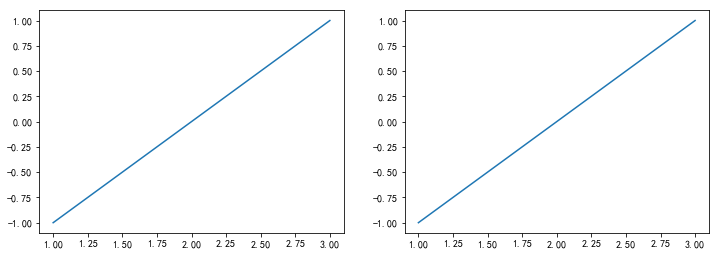

In [210]:
plt.figure(figsize=(12,9))
total_num2 = 2
every_line_num2 = 2
num2 = 1

for i in range(gyh2.shape[0]):
    x1 = [1,2,3]
    y = gyh2[i]
  
    
#     plt_target_num = modify_data111.iloc[0].values[-1]


    the_axes = plt.subplot(total_num2,every_line_num2,num2)
    the_axes.plot(x1,y)

    num2 += 1
        


In [87]:
avg = scale_data.mean(axis=1).values.reshape(88,1)
avg

array([[5.16423712e+02],
       [3.51963495e+02],
       [3.33223530e+02],
       [4.34255825e+02],
       [1.22252954e+03],
       [4.99608631e+02],
       [3.95695134e+02],
       [5.32669394e+02],
       [1.28470360e+02],
       [2.57586240e+02],
       [3.94504856e+02],
       [5.62843883e-01],
       [1.81996077e+00],
       [6.09465480e+02],
       [7.00750825e+02],
       [8.36377781e+02],
       [3.98311660e+02],
       [1.73128128e+02],
       [5.85522702e+01],
       [4.35190182e+01],
       [5.88489068e+01],
       [8.03096024e+01],
       [3.06970958e-01],
       [6.66761399e+01],
       [6.53016124e+01],
       [1.12385340e+02],
       [3.05385388e+01],
       [5.80398880e+02],
       [2.10244486e+01],
       [7.68481891e+01],
       [1.54133343e+02],
       [1.68408497e+02],
       [2.68659968e+02],
       [4.28961772e+01],
       [3.34481604e-01],
       [3.23816372e+02],
       [1.10259380e+03],
       [4.67649634e+02],
       [1.33996220e+02],
       [5.13134395e+02],


In [89]:
res111 = scale_data.values/avg
res111

array([[0.        , 0.        , 0.        , ..., 0.33886903, 0.34467821,
        0.34080542],
       [0.        , 0.        , 0.        , ..., 0.44322778, 0.4517514 ,
        0.4517514 ],
       [0.        , 0.        , 0.        , ..., 0.43814433, 0.45314927,
        0.44414631],
       ...,
       [0.        , 0.        , 0.        , ..., 3.13460562, 3.16166696,
        3.13009539],
       [0.        , 0.        , 0.        , ..., 2.54206394, 2.53261708,
        2.51629978],
       [0.        , 0.        , 0.        , ..., 2.02705262, 2.02860117,
        1.99143596]])

In [146]:
res111 = (scale_data.values - scale_data.values.min()) / (scale_data.values.max() - scale_data.values.min())
res111

array([[0.        , 0.        , 0.        , ..., 0.02152786, 0.02189691,
        0.02165088],
       [0.        , 0.        , 0.        , ..., 0.01919055, 0.0195596 ,
        0.0195596 ],
       [0.        , 0.        , 0.        , ..., 0.01796039, 0.01857547,
        0.01820642],
       ...,
       [0.        , 0.        , 0.        , ..., 0.17099274, 0.17246894,
        0.17074671],
       [0.        , 0.        , 0.        , ..., 0.36412843, 0.36277525,
        0.36043794],
       [0.        , 0.        , 0.        , ..., 0.16102842, 0.16115143,
        0.15819904]])

In [147]:
modify_data11 = DataFrame(data=res111,index=scale_data.index.values,columns=scale_data.columns.values,).round(2)
modify_data11

,214800,214801,214802,214803,214804,214805,214806,214807,214808,214809,...,235691,235692,235693,235694,235695,235696,235697,235698,235699,235700
sample_20180510-1_055,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02
sample_20180510-1_057,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02
sample_20180510-1_060,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02
sample_20180604-1_005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.16,0.16,0.16,0.16,0.16,0.16,0.16,0.16,0.16,0.16
sample_20180604-1_006,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.52,0.52,0.52,0.52,0.52,0.52,0.51,0.50,0.51,0.51
sample_20180604-1_009,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.33,0.33,0.33,0.33,0.33,0.33,0.33,0.32,0.33,0.32
sample_20180604-1_010,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.24,0.25,0.25
sample_20180604-1_011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.30,0.30,0.30,0.30,0.30,0.30,0.30,0.30,0.30,0.30
sample_20180604-1_078,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.08,0.08,0.08,0.08,0.08,0.08,0.07,0.07,0.08,0.08
sample_20180604-1_079,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.14,0.15,0.15


In [148]:
modify_data111 = modify_data11.copy()
modify_data111['the_index'] = modify_data111.index.values
modify_data111['target'] = modify_data111['the_index'].map(myindex)
modify_data111

,214800,214801,214802,214803,214804,214805,214806,214807,214808,214809,...,235693,235694,235695,235696,235697,235698,235699,235700,the_index,target
sample_20180510-1_055,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,sample_20180510-1_055,2
sample_20180510-1_057,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,sample_20180510-1_057,2
sample_20180510-1_060,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,sample_20180510-1_060,4
sample_20180604-1_005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.16,0.16,0.16,0.16,0.16,0.16,0.16,0.16,sample_20180604-1_005,2
sample_20180604-1_006,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.52,0.52,0.52,0.52,0.51,0.50,0.51,0.51,sample_20180604-1_006,2
sample_20180604-1_009,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.33,0.33,0.33,0.33,0.33,0.32,0.33,0.32,sample_20180604-1_009,4
sample_20180604-1_010,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.25,0.25,0.25,0.25,0.25,0.24,0.25,0.25,sample_20180604-1_010,4
sample_20180604-1_011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.30,0.30,0.30,0.30,0.30,0.30,0.30,0.30,sample_20180604-1_011,4
sample_20180604-1_078,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.08,0.08,0.08,0.08,0.07,0.07,0.08,0.08,sample_20180604-1_078,4
sample_20180604-1_079,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.15,0.15,0.15,0.15,0.15,0.14,0.15,0.15,sample_20180604-1_079,2


In [120]:
modify_data111[modify_data111['target'] == 2]

,214800,214801,214802,214803,214804,214805,214806,214807,214808,214809,...,235693,235694,235695,235696,235697,235698,235699,235700,the_index,target
sample_20180510-1_055,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.34,0.34,0.34,0.34,0.34,0.34,0.34,0.34,sample_20180510-1_055,2
sample_20180510-1_057,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.46,0.46,0.46,0.46,0.45,0.44,0.45,0.45,sample_20180510-1_057,2
sample_20180604-1_005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.04,3.03,3.02,3.02,3.01,2.97,3.01,3.00,sample_20180604-1_005,2
sample_20180604-1_006,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.44,3.44,3.43,3.43,3.41,3.35,3.42,3.40,sample_20180604-1_006,2
sample_20180604-1_079,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.69,4.66,4.64,4.64,4.62,4.55,4.62,4.60,sample_20180604-1_079,2
sample_20180704-2_027,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.22,4.21,4.20,4.20,4.19,4.15,4.19,4.18,sample_20180704-2_027,2
sample_20180709-1_059,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.03,2.03,2.03,2.03,2.03,2.03,2.03,2.03,sample_20180709-1_059,2
sample_20180718-1_047,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.82,3.81,3.81,3.81,3.81,3.79,3.80,3.77,sample_20180718-1_047,2
sample_20180718-1_051,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.29,2.30,2.30,2.30,2.30,2.27,2.30,2.27,sample_20180718-1_051,2
sample_20180910-1_005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.29,4.29,4.29,4.29,4.29,4.29,4.29,4.29,sample_20180910-1_005,2


In [110]:
y = modify_data111.iloc[0].values[:-2]
y

array([0.0, 0.0, 0.0, ..., 0.34, 0.34, 0.34], dtype=object)

In [116]:
title = modify_data111.iloc[0].values[-2]
title

'sample_20180510-1_055'

In [269]:
x = data_s_2.columns.values
x

array(['sea', '-3.7', '-4,2', 'cs', 'qs', 'ws', 'the_index', 'target'],
      dtype=object)

In [270]:
x = np.array([1,2,3,4,5,6])

In [267]:
kind2_list = data_s_2[data_s_2['target'] == 2]

kind3_list = data_s_2[data_s_2['target'] == 3]

kind4_list = data_s_2[data_s_2['target'] == 4]

kind5_list = data_s_2[data_s_2['target'] == 5]

kind6_list = data_s_2[data_s_2['target'] == 6]

kind7_list = data_s_2[data_s_2['target'] == 7]

# display(len(kind2_list),len(kind3_list),len(kind4_list),len(kind5_list),len(kind6_list),len(kind7_list))

In [266]:
kind2_list.iloc[0].values[-1] 

2.0

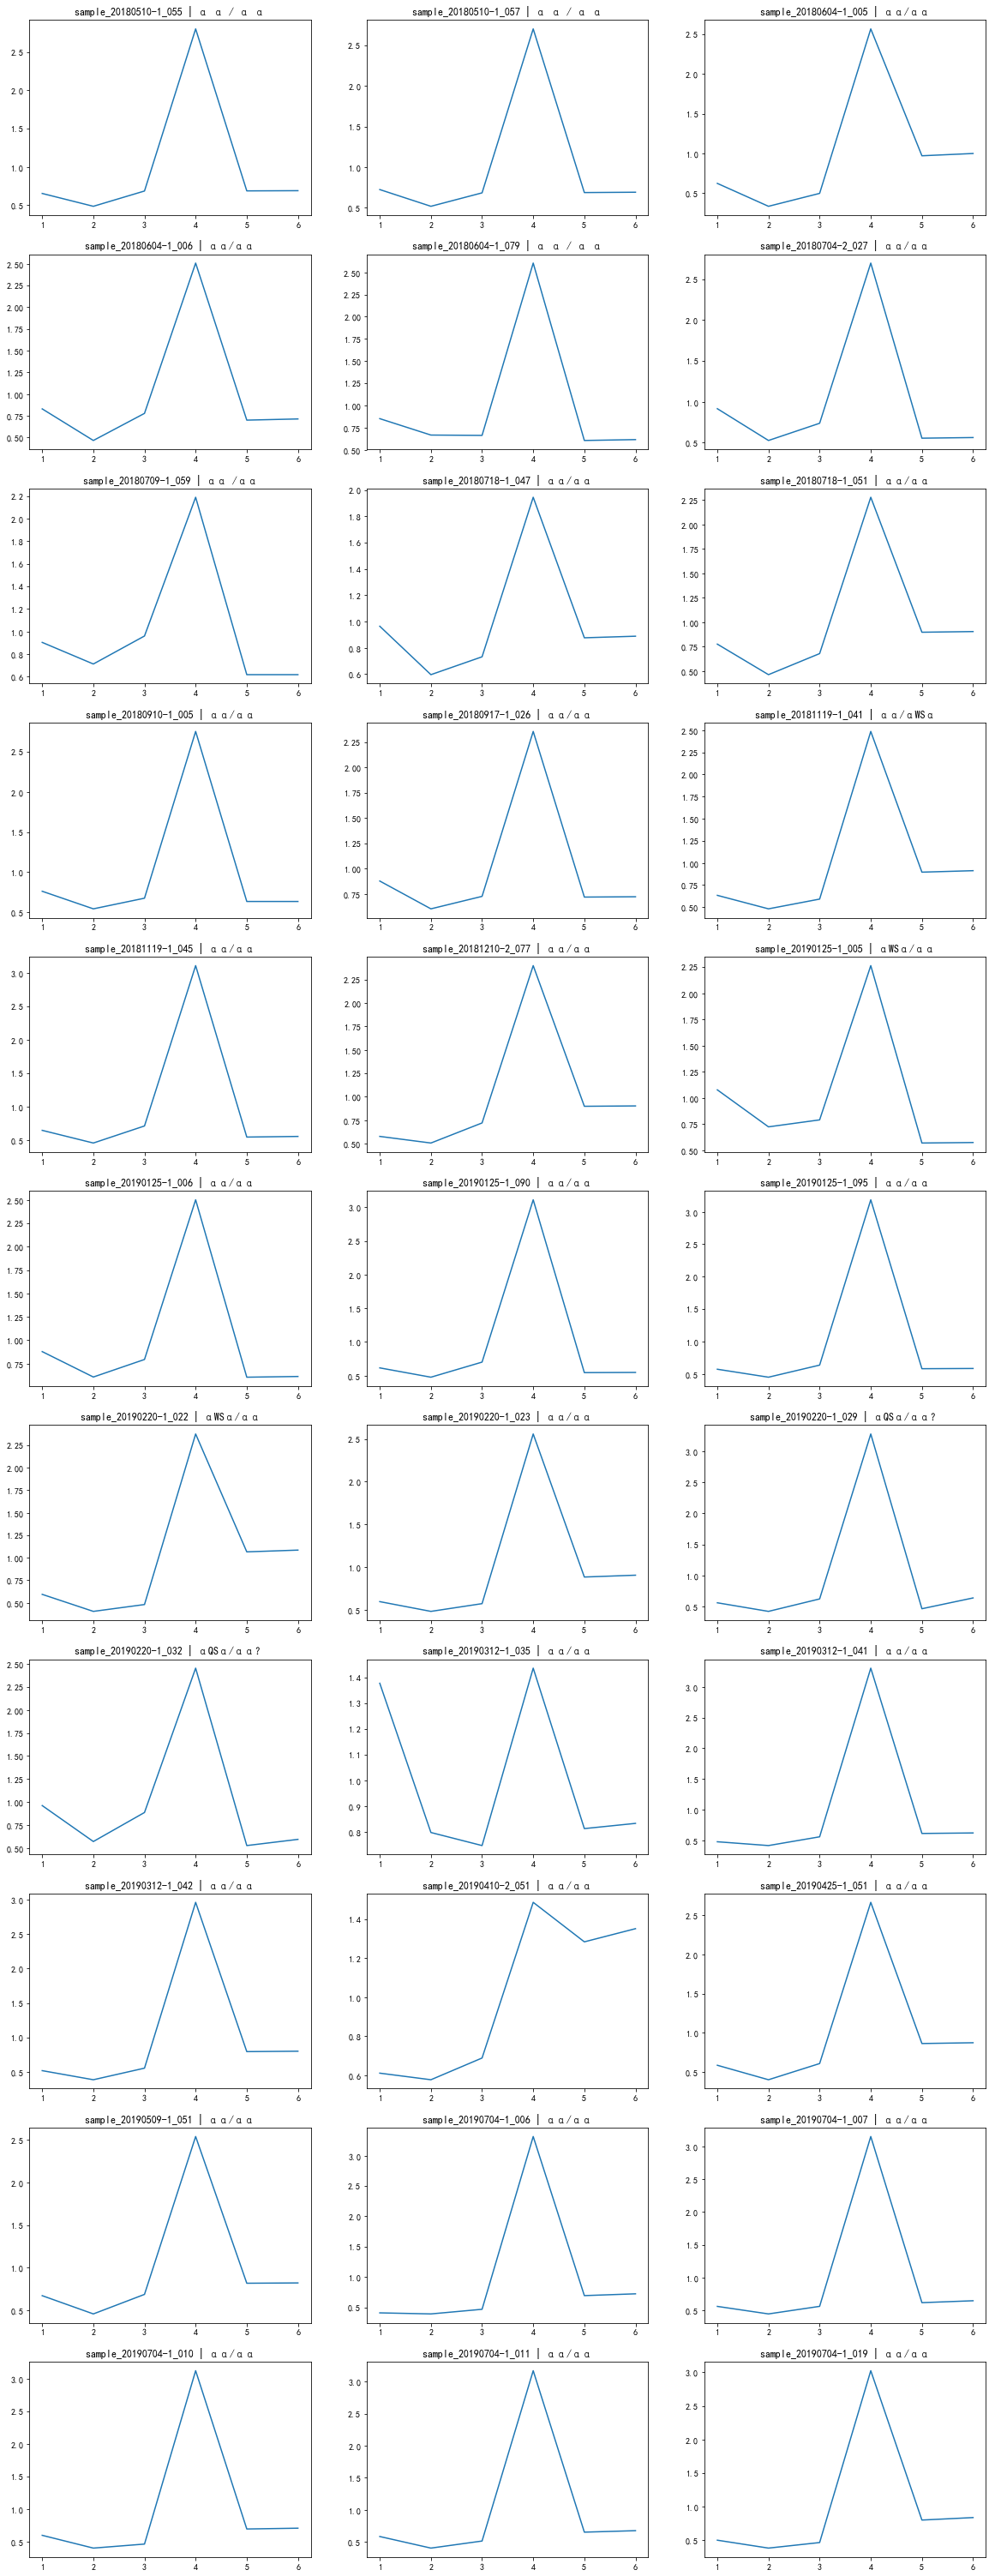

In [271]:
plt.figure(figsize=(20,165))
total_num2 = kind2_list.shape[0]
every_line_num2 = 3
num2 = 1

for i in range(kind2_list.shape[0]):

    y = kind2_list.iloc[i].values[:-2] 
    plt_title = kind2_list.iloc[i].values[-2]
    
#     plt_target_num = modify_data111.iloc[0].values[-1]

    plt_target = target_dict_pgd[plt_title]
    the_axes = plt.subplot(total_num2,every_line_num2,num2)
    the_axes.plot(x,y)
    the_axes.set_title('%s | %s'%(plt_title,plt_target))
    num2 += 1
        


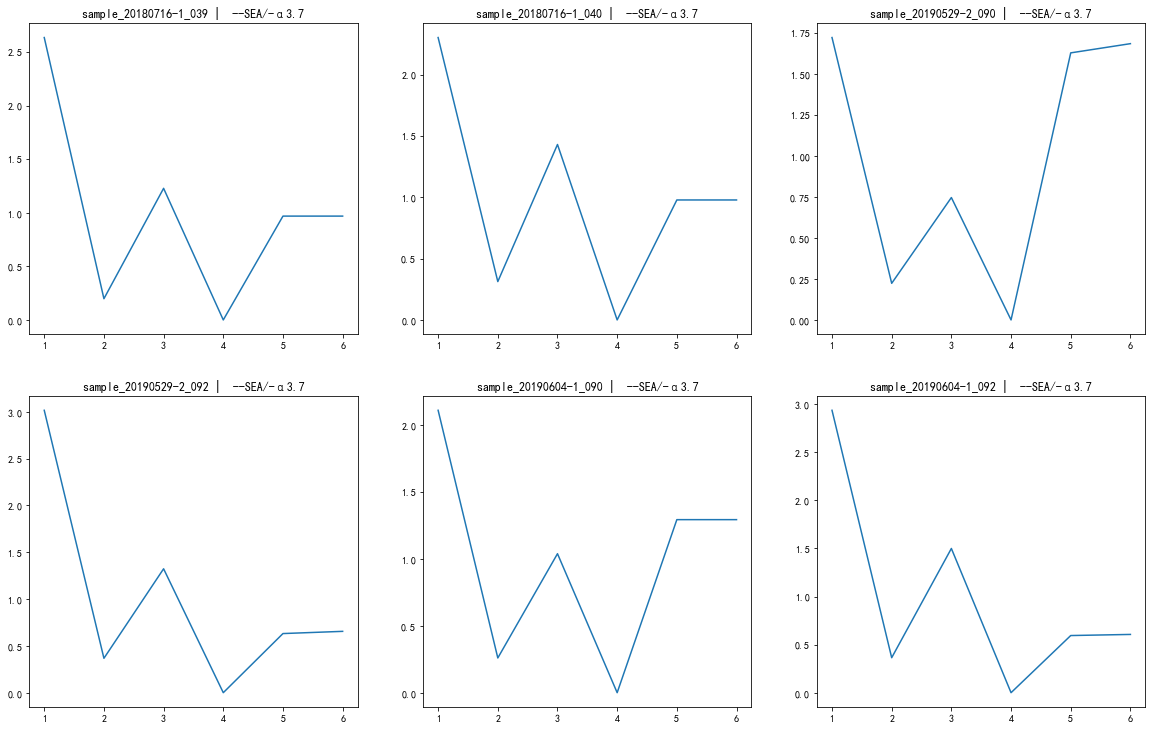

In [272]:
plt.figure(figsize=(20,40))
total_num3 = kind3_list.shape[0]
every_line_num3 = 3
num3 = 1

for i in range(kind3_list.shape[0]):

    y = kind3_list.iloc[i].values[:-2] 
    plt_title = kind3_list.iloc[i].values[-2]
    
#     plt_target_num = modify_data111.iloc[0].values[-1]

    plt_target = target_dict_pgd[plt_title]
    the_axes = plt.subplot(total_num3,every_line_num3,num3)
    the_axes.plot(x,y)
    the_axes.set_title('%s | %s'%(plt_title,plt_target))
    num3 += 1
        

        
    
# plt.savefig('kind.png')

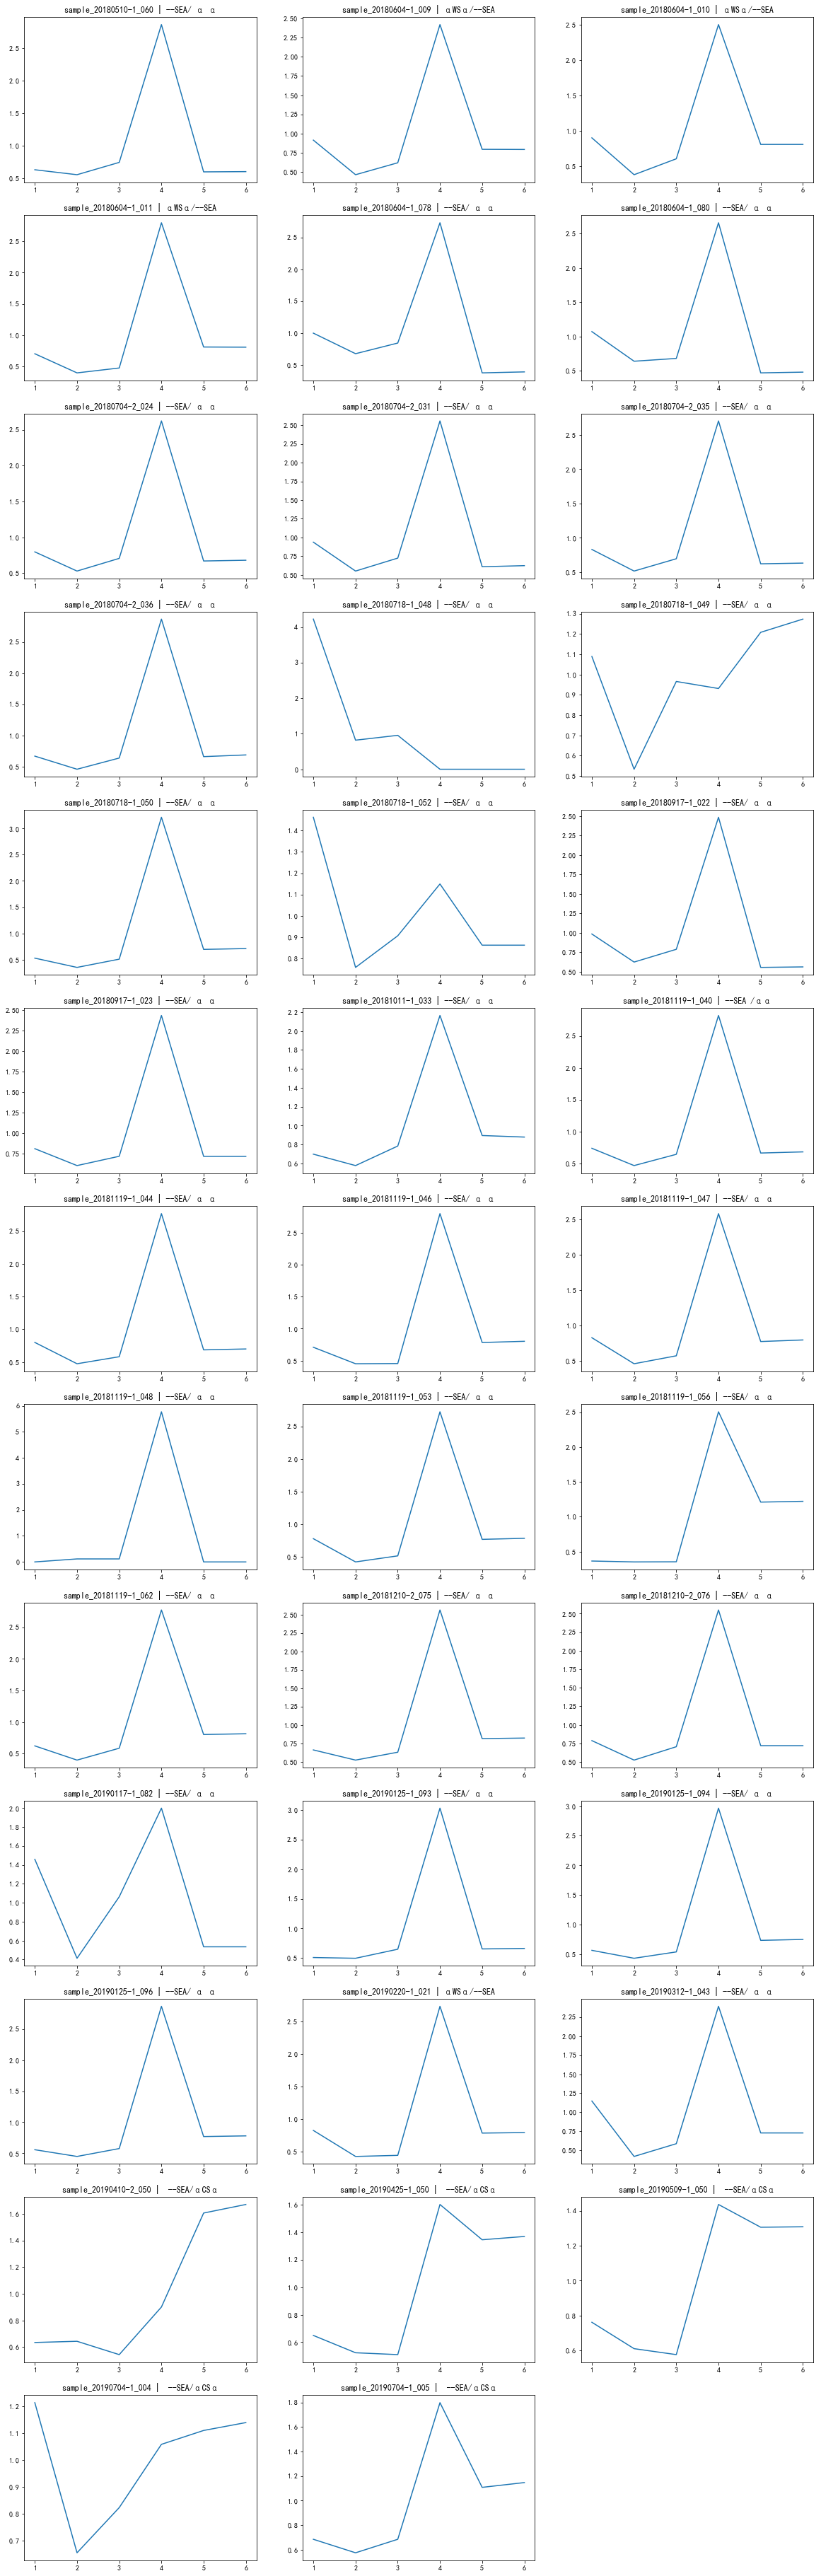

In [273]:
plt.figure(figsize=(20,195))
total_num4 = kind4_list.shape[0]
every_line_num4 = 3
num4 = 1
for i in range(kind4_list.shape[0]):

    y = kind4_list.iloc[i].values[:-2] 
    plt_title = kind4_list.iloc[i].values[-2]
    
#     plt_target_num = modify_data111.iloc[0].values[-1]

    plt_target = target_dict_pgd[plt_title]
    the_axes = plt.subplot(total_num4,every_line_num4,num4)
    the_axes.plot(x,y)
    the_axes.set_title('%s | %s'%(plt_title,plt_target))
    num4 += 1
        


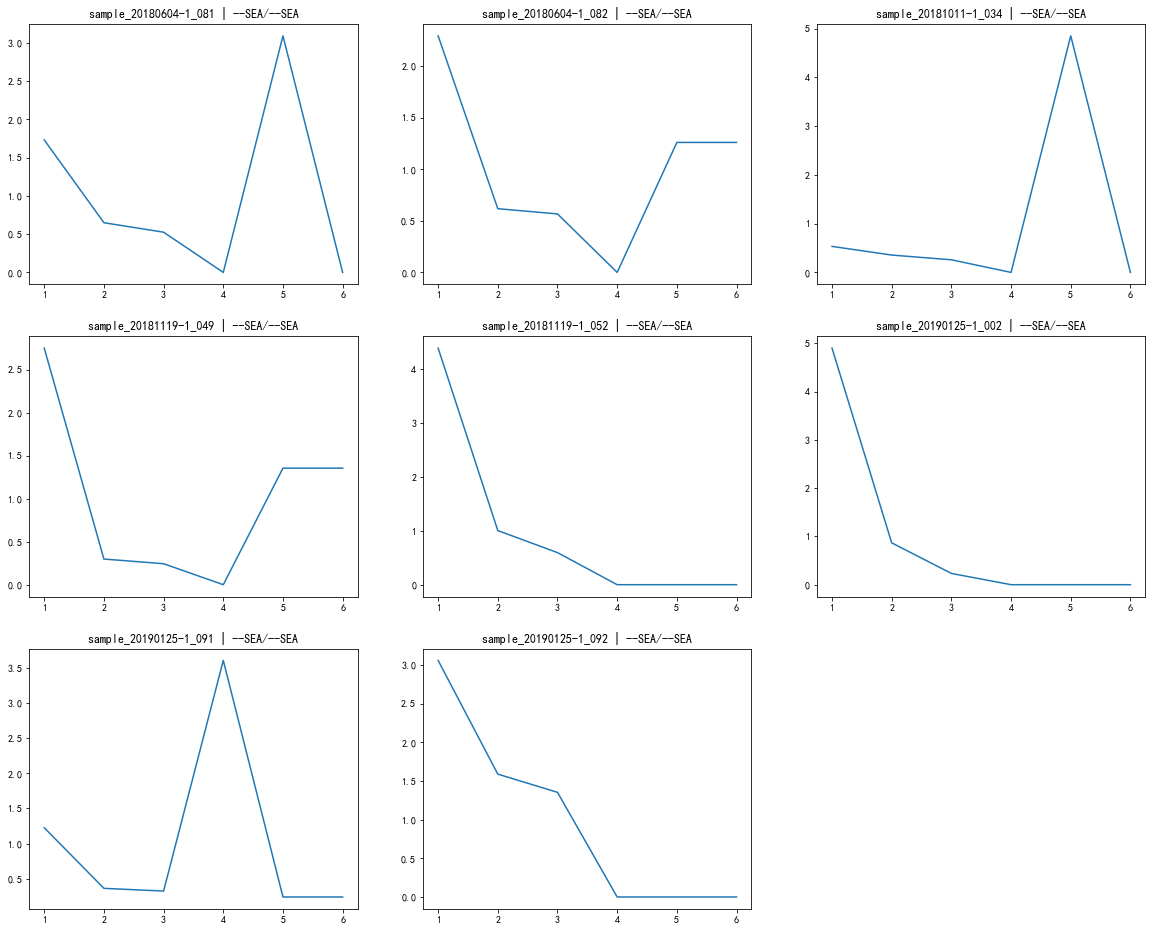

In [274]:

plt.figure(figsize=(20,45))
total_num5 = kind5_list.shape[0]
every_line_num5 = 3
num5 = 1
for i in range(kind5_list.shape[0]):

    y = kind5_list.iloc[i].values[:-2] 
    plt_title = kind5_list.iloc[i].values[-2]
    
#     plt_target_num = modify_data111.iloc[0].values[-1]

    plt_target = target_dict_pgd[plt_title]
    the_axes = plt.subplot(total_num5,every_line_num5,num5)
    the_axes.plot(x,y)
    the_axes.set_title('%s | %s'%(plt_title,plt_target))
    num5 += 1
        


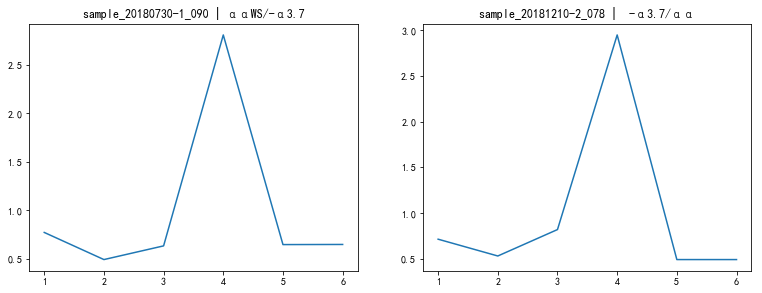

In [275]:

plt.figure(figsize=(20,10))
total_num6 = kind6_list.shape[0]
every_line_num6 = 3
num6 = 1
for i in range(kind6_list.shape[0]):

    y = kind6_list.iloc[i].values[:-2] 
    plt_title = kind6_list.iloc[i].values[-2]
    
#     plt_target_num = modify_data111.iloc[0].values[-1]

    plt_target = target_dict_pgd[plt_title]
    the_axes = plt.subplot(total_num6,every_line_num6,num6)
    the_axes.plot(x,y)
    the_axes.set_title('%s | %s'%(plt_title,plt_target))
    num6 += 1
        


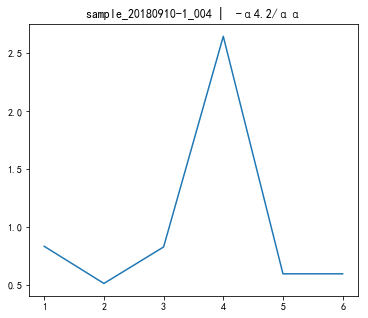

In [276]:
plt.figure(figsize=(20,5))
total_num7 = kind7_list.shape[0]
every_line_num7 = 3
num7 = 1
for i in range(kind7_list.shape[0]):

    y = kind7_list.iloc[i].values[:-2] 
    plt_title = kind7_list.iloc[i].values[-2]
    
#     plt_target_num = modify_data111.iloc[0].values[-1]

    plt_target = target_dict_pgd[plt_title]
    the_axes = plt.subplot(total_num7,every_line_num7,num7)
    the_axes.plot(x,y)
    the_axes.set_title('%s | %s'%(plt_title,plt_target))
    num7 += 1
        


In [287]:
a

array([[   1,    4,    9,    2],
       [   2,    8,   18,    4],
       [  10,   40,   90,   20],
       [  11,   44,   99,   22],
       [  22, 3214,  545,    6]])

In [288]:
a.mean(axis=1)

array([  4.  ,   8.  ,  40.  ,  44.  , 946.75])

In [278]:
a.max(axis=1)

array([   9,   18,   90,   99, 3214])

In [279]:
a.max(axis=1).max()

3214

In [280]:
coeffi = (a.max(axis=1)/a.max(axis=1).max()).reshape(5,1)

In [328]:
d = a/a.max(axis=1).reshape(5,1)
d

array([[0.11111111, 0.44444444, 1.        , 0.22222222],
       [0.11111111, 0.44444444, 1.        , 0.22222222],
       [0.11111111, 0.44444444, 1.        , 0.22222222],
       [0.11111111, 0.44444444, 1.        , 0.22222222],
       [0.00684505, 1.        , 0.16957063, 0.00186683]])

In [281]:
c = (a)/coeffi
c

array([[ 357.11111111, 1428.44444444, 3214.        ,  714.22222222],
       [ 357.11111111, 1428.44444444, 3214.        ,  714.22222222],
       [ 357.11111111, 1428.44444444, 3214.        ,  714.22222222],
       [ 357.11111111, 1428.44444444, 3214.        ,  714.22222222],
       [  22.        , 3214.        ,  545.        ,    6.        ]])

In [290]:
c.mean(axis=1)

array([1428.44444444, 1428.44444444, 1428.44444444, 1428.44444444,
        946.75      ])

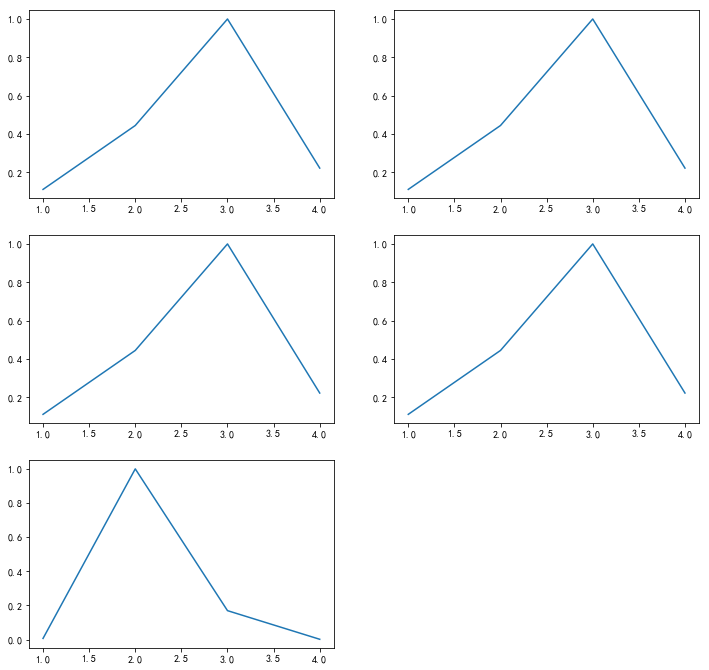

In [329]:
plt.figure(figsize=(12,20))
total_num2 = 5
every_line_num2 = 2
num2 = 1

for i in range(d.shape[0]):
    x1 = [1,2,3,4]
    y = d[i]
  
    
#     plt_target_num = modify_data111.iloc[0].values[-1]


    the_axes = plt.subplot(total_num2,every_line_num2,num2)
    the_axes.plot(x1,y)

    num2 += 1
        


In [ ]:
kind2_list = data_s_2[data_s_2['target'] == 2]

kind3_list = data_s_2[data_s_2['target'] == 3]

kind4_list = data_s_2[data_s_2['target'] == 4]

kind5_list = data_s_2[data_s_2['target'] == 5]

kind6_list = data_s_2[data_s_2['target'] == 6]

kind7_list = data_s_2[data_s_2['target'] == 7]

# display(len(kind2_list),len(kind3_list),len(kind4_list),len(kind5_list),len(kind6_list),len(kind7_list))

In [292]:
data_scale

,71277,71278,71279,71280,71281,71282,71283,71284,71285,71286,...,336700,336701,sea,-3.7,"-4,2",cs,qs,ws,the_index,target
sample_20180510-1_055,85.0,85.0,85.0,85.0,86.0,86.0,47.0,86.0,86.0,84.0,...,219.0,221.0,516.42,383.91,541.61,2214.0,543.0,545.0,sample_20180510-1_055,2
sample_20180510-1_057,38.0,38.0,38.0,38.0,38.0,38.0,20.0,38.0,38.0,38.0,...,108.0,108.0,351.96,251.58,332.24,1316.0,334.0,336.0,sample_20180510-1_057,2
sample_20180510-1_060,94.0,95.0,95.0,95.0,101.0,101.0,43.0,101.0,102.0,100.0,...,302.0,301.0,333.22,293.09,392.67,1507.0,316.0,318.0,sample_20180510-1_060,4
sample_20180604-1_005,36.0,36.0,36.0,36.0,36.0,36.0,24.0,36.0,36.0,36.0,...,162.0,161.0,434.26,233.66,346.82,1787.0,676.0,696.0,sample_20180604-1_005,2
sample_20180604-1_006,90.0,90.0,90.0,90.0,90.0,90.0,69.0,91.0,91.0,88.0,...,56.0,56.0,1222.53,687.19,1146.30,3693.0,1032.0,1052.0,sample_20180604-1_006,2
sample_20180604-1_009,28.0,28.0,28.0,28.0,28.0,28.0,21.0,28.0,28.0,28.0,...,86.0,86.0,499.61,252.92,338.08,1324.0,434.0,433.0,sample_20180604-1_009,4
sample_20180604-1_010,58.0,58.0,58.0,58.0,60.0,60.0,43.0,61.0,61.0,61.0,...,130.0,130.0,395.70,166.36,265.44,1101.0,355.0,355.0,sample_20180604-1_010,4
sample_20180604-1_011,21.0,21.0,21.0,21.0,21.0,21.0,17.0,21.0,21.0,22.0,...,182.0,182.0,532.67,301.80,360.82,2113.0,614.0,612.0,sample_20180604-1_011,4
sample_20180604-1_078,146.0,147.0,147.0,148.0,148.0,148.0,110.0,148.0,148.0,146.0,...,86.0,85.0,128.47,86.86,108.42,352.0,48.0,50.0,sample_20180604-1_078,4
sample_20180604-1_079,80.0,81.0,81.0,81.0,81.0,81.0,59.0,81.0,81.0,81.0,...,38.0,38.0,257.59,201.53,200.40,789.0,183.0,186.0,sample_20180604-1_079,2


In [19]:
product_data = (modify_data.values)/coeffi

In [20]:
modify_data1 = DataFrame(data=product_data,index=modify_data.index.values,columns=modify_data.columns.values,)
modify_data1.head()

,71277,71278,71279,71280,71281,71282,71283,71284,71285,71286,...,336692,336693,336694,336695,336696,336697,336698,336699,336700,336701
sample_20180510-1_055,85.780881,85.780881,85.780881,85.780881,86.790068,86.790068,47.431782,86.790068,86.790068,84.771695,...,222.021105,222.021105,220.002731,222.021105,222.021105,222.021105,222.021105,222.021105,221.011918,223.030292
sample_20180510-1_057,38.344340,38.344340,38.344340,38.344340,38.344340,38.344340,20.181231,38.344340,38.344340,38.344340,...,108.978649,108.978649,108.978649,108.978649,106.960526,108.978649,108.978649,108.978649,108.978649,108.978649
sample_20180510-1_060,94.851787,95.860849,95.860849,95.860849,101.915218,101.915218,43.389647,101.915218,102.924280,100.906157,...,304.736594,304.736594,303.727532,304.736594,299.691286,304.736594,304.736594,304.736594,304.736594,303.727532
sample_20180604-1_005,36.484728,36.484728,36.484728,36.484728,36.484728,36.484728,24.323152,36.484728,36.484728,36.484728,...,166.208203,166.208203,166.208203,165.194739,165.194739,165.194739,164.181274,164.181274,164.181274,163.167810
sample_20180604-1_006,91.143640,91.143640,91.143640,91.143640,91.143640,91.143640,69.876791,92.156347,92.156347,89.118226,...,55.698891,55.698891,56.711598,56.711598,56.711598,56.711598,56.711598,56.711598,56.711598,56.711598


In [21]:
%%time
modify_data2 = round(modify_data1,2).copy()

Wall time: 1min 21s


In [23]:
def my_round(arg):
    if isinstance(arg,float) or isinstance(arg,int):
        return round(arg,2)
    return arg

In [294]:
data_scale

,71277,71278,71279,71280,71281,71282,71283,71284,71285,71286,...,336700,336701,sea,-3.7,"-4,2",cs,qs,ws,the_index,target
sample_20180510-1_055,85.0,85.0,85.0,85.0,86.0,86.0,47.0,86.0,86.0,84.0,...,219.0,221.0,516.423712,383.909377,541.610627,2214.0,543.0,545.0,sample_20180510-1_055,2
sample_20180510-1_057,38.0,38.0,38.0,38.0,38.0,38.0,20.0,38.0,38.0,38.0,...,108.0,108.0,351.963495,251.584712,332.239706,1316.0,334.0,336.0,sample_20180510-1_057,2
sample_20180510-1_060,94.0,95.0,95.0,95.0,101.0,101.0,43.0,101.0,102.0,100.0,...,302.0,301.0,333.223530,293.091411,392.665300,1507.0,316.0,318.0,sample_20180510-1_060,4
sample_20180604-1_005,36.0,36.0,36.0,36.0,36.0,36.0,24.0,36.0,36.0,36.0,...,162.0,161.0,434.255825,233.656422,346.822313,1787.0,676.0,696.0,sample_20180604-1_005,2
sample_20180604-1_006,90.0,90.0,90.0,90.0,90.0,90.0,69.0,91.0,91.0,88.0,...,56.0,56.0,1222.529544,687.185448,1146.298992,3693.0,1032.0,1052.0,sample_20180604-1_006,2
sample_20180604-1_009,28.0,28.0,28.0,28.0,28.0,28.0,21.0,28.0,28.0,28.0,...,86.0,86.0,499.608631,252.922774,338.082009,1324.0,434.0,433.0,sample_20180604-1_009,4
sample_20180604-1_010,58.0,58.0,58.0,58.0,60.0,60.0,43.0,61.0,61.0,61.0,...,130.0,130.0,395.695134,166.358813,265.436870,1101.0,355.0,355.0,sample_20180604-1_010,4
sample_20180604-1_011,21.0,21.0,21.0,21.0,21.0,21.0,17.0,21.0,21.0,22.0,...,182.0,182.0,532.669394,301.797741,360.817188,2113.0,614.0,612.0,sample_20180604-1_011,4
sample_20180604-1_078,146.0,147.0,147.0,148.0,148.0,148.0,110.0,148.0,148.0,146.0,...,86.0,85.0,128.470360,86.860783,108.417564,352.0,48.0,50.0,sample_20180604-1_078,4
sample_20180604-1_079,80.0,81.0,81.0,81.0,81.0,81.0,59.0,81.0,81.0,81.0,...,38.0,38.0,257.586240,201.528763,200.399624,789.0,183.0,186.0,sample_20180604-1_079,2


In [293]:
data_scale = modify_data.copy()
data_scale['sea'] = data_scale.iloc[:,143523:164424].mean(axis=1).values
data_scale['-3.7'] = data_scale.iloc[:,152020:155827].mean(axis=1).values
data_scale['-4,2'] = data_scale.iloc[:,147989:153842].mean(axis=1).values
data_scale['cs'] = data_scale.iloc[:,152320].values
data_scale['qs'] = data_scale.iloc[:,152270].values
data_scale['ws'] = data_scale.iloc[:,152262].values
data_scale['the_index'] = data_scale.index.values
data_scale['target'] = data_scale['the_index'].map(myindex)


In [353]:
modify_data.iloc[:,147989:153842]

,219266,219267,219268,219269,219270,219271,219272,219273,219274,219275,...,225109,225110,225111,225112,225113,225114,225115,225116,225117,225118
sample_20180510-1_055,1962.0,1962.0,1961.0,1942.0,1961.0,1955.0,1954.0,1946.0,1952.0,1947.0,...,441.0,441.0,441.0,443.0,444.0,443.0,446.0,444.0,444.0,432.0
sample_20180510-1_057,1246.0,1245.0,1245.0,1232.0,1243.0,1241.0,1240.0,1236.0,1240.0,1238.0,...,328.0,329.0,329.0,329.0,329.0,327.0,330.0,329.0,329.0,312.0
sample_20180510-1_060,1421.0,1421.0,1420.0,1396.0,1419.0,1413.0,1411.0,1403.0,1413.0,1410.0,...,368.0,368.0,369.0,369.0,370.0,364.0,370.0,369.0,370.0,349.0
sample_20180604-1_005,780.0,778.0,776.0,771.0,776.0,776.0,774.0,776.0,773.0,770.0,...,310.0,310.0,310.0,310.0,309.0,310.0,311.0,311.0,311.0,310.0
sample_20180604-1_006,4550.0,4542.0,4540.0,4484.0,4537.0,4527.0,4500.0,4515.0,4524.0,4512.0,...,596.0,597.0,597.0,597.0,597.0,595.0,600.0,601.0,601.0,590.0
sample_20180604-1_009,1130.0,1128.0,1126.0,1109.0,1125.0,1124.0,1120.0,1114.0,1121.0,1119.0,...,250.0,252.0,252.0,252.0,252.0,251.0,252.0,252.0,251.0,251.0
sample_20180604-1_010,732.0,731.0,731.0,722.0,728.0,725.0,722.0,720.0,722.0,720.0,...,192.0,193.0,193.0,193.0,194.0,193.0,196.0,196.0,196.0,195.0
sample_20180604-1_011,895.0,894.0,893.0,883.0,891.0,888.0,884.0,886.0,888.0,887.0,...,360.0,360.0,360.0,360.0,360.0,361.0,364.0,364.0,363.0,360.0
sample_20180604-1_078,604.0,604.0,602.0,599.0,603.0,601.0,598.0,600.0,601.0,599.0,...,47.0,47.0,47.0,47.0,47.0,47.0,47.0,47.0,47.0,47.0
sample_20180604-1_079,655.0,655.0,656.0,650.0,656.0,653.0,650.0,648.0,653.0,653.0,...,198.0,198.0,198.0,198.0,198.0,195.0,198.0,197.0,197.0,196.0


In [352]:
modify_data.iloc[:,143523:164424].iloc[:,147989-143523:153842-143523]

,219266,219267,219268,219269,219270,219271,219272,219273,219274,219275,...,225109,225110,225111,225112,225113,225114,225115,225116,225117,225118
sample_20180510-1_055,1962.0,1962.0,1961.0,1942.0,1961.0,1955.0,1954.0,1946.0,1952.0,1947.0,...,441.0,441.0,441.0,443.0,444.0,443.0,446.0,444.0,444.0,432.0
sample_20180510-1_057,1246.0,1245.0,1245.0,1232.0,1243.0,1241.0,1240.0,1236.0,1240.0,1238.0,...,328.0,329.0,329.0,329.0,329.0,327.0,330.0,329.0,329.0,312.0
sample_20180510-1_060,1421.0,1421.0,1420.0,1396.0,1419.0,1413.0,1411.0,1403.0,1413.0,1410.0,...,368.0,368.0,369.0,369.0,370.0,364.0,370.0,369.0,370.0,349.0
sample_20180604-1_005,780.0,778.0,776.0,771.0,776.0,776.0,774.0,776.0,773.0,770.0,...,310.0,310.0,310.0,310.0,309.0,310.0,311.0,311.0,311.0,310.0
sample_20180604-1_006,4550.0,4542.0,4540.0,4484.0,4537.0,4527.0,4500.0,4515.0,4524.0,4512.0,...,596.0,597.0,597.0,597.0,597.0,595.0,600.0,601.0,601.0,590.0
sample_20180604-1_009,1130.0,1128.0,1126.0,1109.0,1125.0,1124.0,1120.0,1114.0,1121.0,1119.0,...,250.0,252.0,252.0,252.0,252.0,251.0,252.0,252.0,251.0,251.0
sample_20180604-1_010,732.0,731.0,731.0,722.0,728.0,725.0,722.0,720.0,722.0,720.0,...,192.0,193.0,193.0,193.0,194.0,193.0,196.0,196.0,196.0,195.0
sample_20180604-1_011,895.0,894.0,893.0,883.0,891.0,888.0,884.0,886.0,888.0,887.0,...,360.0,360.0,360.0,360.0,360.0,361.0,364.0,364.0,363.0,360.0
sample_20180604-1_078,604.0,604.0,602.0,599.0,603.0,601.0,598.0,600.0,601.0,599.0,...,47.0,47.0,47.0,47.0,47.0,47.0,47.0,47.0,47.0,47.0
sample_20180604-1_079,655.0,655.0,656.0,650.0,656.0,653.0,650.0,648.0,653.0,653.0,...,198.0,198.0,198.0,198.0,198.0,195.0,198.0,197.0,197.0,196.0


In [238]:
data_scale['sea'] = data_scale['sea'].map(my_round)
data_scale['-3.7'] = data_scale['-3.7'].map(my_round)
data_scale['-4,2'] = data_scale['-4,2'].map(my_round)
data_scale['cs'] = data_scale['cs'].map(my_round)
data_scale['qs'] = data_scale['qs'].map(my_round)
data_scale['ws'] = data_scale['ws'].map(my_round)
data_scale.head()

,71277,71278,71279,71280,71281,71282,71283,71284,71285,71286,...,336700,336701,sea,-3.7,"-4,2",cs,qs,ws,the_index,target
sample_20180510-1_055,85.0,85.0,85.0,85.0,86.0,86.0,47.0,86.0,86.0,84.0,...,219.0,221.0,516.42,383.91,541.61,2214.0,543.0,545.0,sample_20180510-1_055,2
sample_20180510-1_057,38.0,38.0,38.0,38.0,38.0,38.0,20.0,38.0,38.0,38.0,...,108.0,108.0,351.96,251.58,332.24,1316.0,334.0,336.0,sample_20180510-1_057,2
sample_20180510-1_060,94.0,95.0,95.0,95.0,101.0,101.0,43.0,101.0,102.0,100.0,...,302.0,301.0,333.22,293.09,392.67,1507.0,316.0,318.0,sample_20180510-1_060,4
sample_20180604-1_005,36.0,36.0,36.0,36.0,36.0,36.0,24.0,36.0,36.0,36.0,...,162.0,161.0,434.26,233.66,346.82,1787.0,676.0,696.0,sample_20180604-1_005,2
sample_20180604-1_006,90.0,90.0,90.0,90.0,90.0,90.0,69.0,91.0,91.0,88.0,...,56.0,56.0,1222.53,687.19,1146.30,3693.0,1032.0,1052.0,sample_20180604-1_006,2


In [241]:
for_test_data = data_scale.iloc[:,-8:-2]
for_test_data

,sea,-3.7,"-4,2",cs,qs,ws
sample_20180510-1_055,516.42,383.91,541.61,2214.0,543.0,545.0
sample_20180510-1_057,351.96,251.58,332.24,1316.0,334.0,336.0
sample_20180510-1_060,333.22,293.09,392.67,1507.0,316.0,318.0
sample_20180604-1_005,434.26,233.66,346.82,1787.0,676.0,696.0
sample_20180604-1_006,1222.53,687.19,1146.30,3693.0,1032.0,1052.0
sample_20180604-1_009,499.61,252.92,338.08,1324.0,434.0,433.0
sample_20180604-1_010,395.70,166.36,265.44,1101.0,355.0,355.0
sample_20180604-1_011,532.67,301.80,360.82,2113.0,614.0,612.0
sample_20180604-1_078,128.47,86.86,108.42,352.0,48.0,50.0
sample_20180604-1_079,257.59,201.53,200.40,789.0,183.0,186.0


In [244]:
for_target = data_scale.iloc[:,-1].values
for_target

array([2, 2, 4, 2, 2, 4, 4, 4, 4, 2, 4, 5, 5, 4, 2, 4, 4, 4, 2, 3, 3, 2,
       4, 4, 4, 2, 4, 6, 7, 2, 4, 4, 2, 4, 5, 4, 2, 4, 2, 4, 4, 4, 5, 5,
       4, 4, 4, 4, 4, 2, 6, 4, 5, 2, 2, 2, 5, 5, 4, 4, 2, 4, 4, 2, 2, 2,
       2, 2, 2, 2, 4, 4, 2, 4, 2, 4, 2, 3, 3, 3, 3, 4, 4, 2, 2, 2, 2, 2],
      dtype=int64)

In [384]:
chu_max_change.head()

,71277,71278,71279,71280,71281,71282,71283,71284,71285,71286,...,336692,336693,336694,336695,336696,336697,336698,336699,336700,336701
sample_20180510-1_055,85.0,85.0,85.0,85.0,86.0,86.0,47.0,86.0,86.0,84.0,...,220.0,220.0,218.0,220.0,220.0,220.0,220.0,220.0,219.0,221.0
sample_20180510-1_057,38.0,38.0,38.0,38.0,38.0,38.0,20.0,38.0,38.0,38.0,...,108.0,108.0,108.0,108.0,106.0,108.0,108.0,108.0,108.0,108.0
sample_20180510-1_060,94.0,95.0,95.0,95.0,101.0,101.0,43.0,101.0,102.0,100.0,...,302.0,302.0,301.0,302.0,297.0,302.0,302.0,302.0,302.0,301.0
sample_20180604-1_005,36.0,36.0,36.0,36.0,36.0,36.0,24.0,36.0,36.0,36.0,...,164.0,164.0,164.0,163.0,163.0,163.0,162.0,162.0,162.0,161.0
sample_20180604-1_006,90.0,90.0,90.0,90.0,90.0,90.0,69.0,91.0,91.0,88.0,...,55.0,55.0,56.0,56.0,56.0,56.0,56.0,56.0,56.0,56.0


In [388]:
a

array([[   1,    4,    9,    2],
       [   2,    8,   18,    4],
       [  10,   40,   90,   20],
       [  11,   44,   99,   22],
       [  22, 3214,  545,    6]])

In [412]:
chu_max_change = modify_data.iloc[:,143523:164424].copy()
chu_max_change_data = chu_max_change.values/chu_max_change.values.max(axis=1).reshape(chu_max_change.shape[0],1)
chu_max_change_data

array([[0.        , 0.        , 0.        , ..., 0.02191609, 0.0222918 ,
        0.02204133],
       [0.        , 0.        , 0.        , ..., 0.03131901, 0.0319213 ,
        0.0319213 ],
       [0.        , 0.        , 0.        , ..., 0.02996101, 0.03098707,
        0.03037143],
       ...,
       [0.        , 0.        , 0.        , ..., 0.21997151, 0.22187055,
        0.21965501],
       [0.        , 0.        , 0.        , ..., 0.36793039, 0.36656308,
        0.36420137],
       [0.        , 0.        , 0.        , ..., 0.17255471, 0.17268653,
        0.16952281]])

In [344]:
chu_mean_change = modify_data.iloc[:,143523:164424].copy()
chu_mean_change_data = chu_mean_change.values/chu_mean_change.values.mean(axis=1).reshape(chu_mean_change_data.shape[0],1)
chu_mean_change_data

array([[0.        , 0.        , 0.        , ..., 0.33886903, 0.34467821,
        0.34080542],
       [0.        , 0.        , 0.        , ..., 0.44322778, 0.4517514 ,
        0.4517514 ],
       [0.        , 0.        , 0.        , ..., 0.43814433, 0.45314927,
        0.44414631],
       ...,
       [0.        , 0.        , 0.        , ..., 3.13460562, 3.16166696,
        3.13009539],
       [0.        , 0.        , 0.        , ..., 2.54206394, 2.53261708,
        2.51629978],
       [0.        , 0.        , 0.        , ..., 2.02705262, 2.02860117,
        1.99143596]])

In [245]:
data_s = for_test_data.values/for_test_data.values.mean(axis=1).reshape(88,1)
data_s

array([[6.53153286e-01, 4.85558418e-01, 6.85012880e-01, 2.80020405e+00,
        6.86770912e-01, 6.89300455e-01],
       [7.22764890e-01, 5.16630273e-01, 6.82269028e-01, 2.70246220e+00,
        6.85883263e-01, 6.89990348e-01],
       [6.32700207e-01, 5.56503522e-01, 7.45580668e-01, 2.86141052e+00,
        6.00003797e-01, 6.03801290e-01],
       [6.24274631e-01, 3.35900176e-01, 4.98574420e-01, 2.56891900e+00,
        9.71790289e-01, 1.00054148e+00],
       [8.30427193e-01, 4.66787124e-01, 7.78646488e-01, 2.50854181e+00,
        7.01005998e-01, 7.14591386e-01],
       [9.13472350e-01, 4.62431550e-01, 6.18135610e-01, 2.42076298e+00,
        7.93512940e-01, 7.91684569e-01],
       [8.99829449e-01, 3.78305856e-01, 6.03615691e-01, 2.50369528e+00,
        8.07276862e-01, 8.07276862e-01],
       [7.04855666e-01, 3.99356900e-01, 4.77455125e-01, 2.79602760e+00,
        8.12475603e-01, 8.09829102e-01],
       [9.96213247e-01, 6.73550889e-01, 8.40736672e-01, 2.72956381e+00,
        3.72213247e-01, 

In [ ]:
data_s_s = a/a.max(axis=1).reshape(5,1)

In [413]:
data_s_2 = DataFrame(data=chu_max_change_data,index=chu_max_change.index.values,columns=chu_max_change.columns.values,)
data_s_2['sea'] = data_s_2.mean(axis=1).values
data_s_2['-3.7'] = data_s_2.iloc[:,152020-143523:155827-143523].mean(axis=1).values
data_s_2['-4,2'] = data_s_2.iloc[:,147989-143523:153842-143523].mean(axis=1).values
data_s_2['cs'] = data_s_2.iloc[:,152320-143523].values
data_s_2['qs'] = data_s_2.iloc[:,152270-143523].values
data_s_2['ws'] = data_s_2.iloc[:,152262-143523].values
data_s_2['the_index'] = data_s_2.index.values
data_s_2['target'] = data_s_2['the_index'].map(myindex)
data_s_2.head()

,214800,214801,214802,214803,214804,214805,214806,214807,214808,214809,...,235699,235700,sea,-3.7,"-4,2",cs,qs,ws,the_index,target
sample_20180510-1_055,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.022292,0.022041,0.064674,0.048079,0.067829,0.277270,0.068003,0.068253,sample_20180510-1_055,2
sample_20180510-1_057,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.031921,0.031921,0.070661,0.050509,0.066701,0.264204,0.067055,0.067456,sample_20180510-1_057,2
sample_20180510-1_060,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.030987,0.030371,0.068382,0.060146,0.080580,0.309255,0.064847,0.065258,sample_20180510-1_060,4
sample_20180604-1_005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.209034,0.208393,0.069559,0.037427,0.055554,0.286241,0.108281,0.111485,sample_20180604-1_005,2
sample_20180604-1_006,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.520877,0.518011,0.152378,0.085652,0.142877,0.460302,0.128630,0.131123,sample_20180604-1_006,2


In [ ]:
data_scale = modify_data.copy()
data_scale['sea'] = data_scale.mean(axis=1).values
data_scale['-3.7'] = data_scale.iloc[:,152020-143523:155827-143523].mean(axis=1).values
data_scale['-4,2'] = data_scale.iloc[:,147989-143523:153842-143523].mean(axis=1).values
data_scale['cs'] = data_scale.iloc[:,152320-143523].values
data_scale['qs'] = data_scale.iloc[:,152270-143523].values
data_scale['ws'] = data_scale.iloc[:,152262-143523].values
data_scale['the_index'] = data_scale.index.values
data_scale['target'] = data_scale['the_index'].map(myindex)


In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV,train_test_split

F:\software\the_anaconda\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [417]:
#开始映射，获取映射了pgd结果和索引标签的数据
the_data_6 = data_s_2.iloc[:,-8:-2]
the_target_6 = data_s_2.iloc[:,-1].values

In [157]:
#开始映射，获取映射了pgd结果和索引标签的数据
the_data_6 = data_3.iloc[:,:-8]
the_target_6 = data_3.iloc[:,-1].values

In [418]:
X_train, X_test, y_train, y_test = train_test_split(the_data_6, the_target_6, test_size=0.3)
print(X_train.shape, y_train.shape)
print( X_test.shape, y_test.shape)

(61, 6) (61,)
(27, 6) (27,)


In [395]:
k = [2,3,4,5,6,7,8,9,10,15,21]
weights = ['uniform','distance']
# 1 曼哈顿距离
# 2 欧氏距离
p = [1,2]
knn = KNeighborsClassifier()
gCV = GridSearchCV(knn,param_grid={'n_neighbors':k,'weights':weights,'p':p})


# c = [0.2,0.5,1,3,5]
# kernel = ['rbf']
# degree = [1,3,5,7]
# # If gamma is 'auto' then 1/n_features will be used instead.1/300 = 0.003
# gamma = [0.001,0.003,0.005,0.01,0.1]
# svc = svm.SVC()
# gCV = GridSearchCV(svc,param_grid={'C':c,'kernel':kernel,'degree':degree,'gamma':gamma})



In [396]:
%%time 
gCV.fit(X_train,y_train)

F:\software\the_anaconda\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


Wall time: 19 s


GridSearchCV(cv=None, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 21], 'weights': ['uniform', 'distance'], 'p': [1, 2]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [397]:
best_score = gCV.best_score_
best_params = gCV.best_params_
best_estimator = gCV.best_estimator_
print(best_score)
print(best_params)
print(best_estimator)

0.7049180327868853
{'n_neighbors': 2, 'p': 1, 'weights': 'distance'}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=1,
           weights='distance')


In [398]:
pre_y = best_estimator.predict(X_test)
# train_score = knn_best.score(X_train,y_train)
pre_score = best_estimator.score(X_test,y_test)
# print('KNN结果如下：\n预测值：%s \n实际值：%s \n训练分数:%s \n预测分数:%s\n-------------- '%(pre_y,y_test,train_score,pre_score))
print('KNN结果如下：\n预测值：%s \n实际值：%s \n预测分数:%s\n-------------- '%(pre_y,y_test,pre_score))


KNN结果如下：
预测值：[2 2 4 2 2 2 2 4 2 4 4 4 4 2 4 7 2 2 6 4 2 4 4 4 4 4 4] 
实际值：[4 4 2 2 4 2 4 2 4 3 4 2 2 4 4 2 2 2 4 4 4 4 4 2 4 2 3] 
预测分数:0.37037037037037035
-------------- 


In [65]:
pca = PCA(n_components=1000)

In [67]:
# 5000
display(X_train.shape)
pca.fit(X_train)
X_train = pca.transform(X_train)
display(X_train.shape)
# X_train_pca = pca.transform(X_train)
# display(X_train.shape,X_train_pca.shape)

(61, 265425)

(61, 61)

In [63]:
# X_test_pca = pca.transform(X_test)
X_test = pca.transform(X_test)
X_test.shape

(27, 61)

In [369]:
%%time 
gCV.fit(X_train,y_train)

F:\software\the_anaconda\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


Wall time: 1.07 s


GridSearchCV(cv=None, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 21], 'weights': ['uniform', 'distance'], 'p': [1, 2]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [370]:
best_score = gCV.best_score_
best_params = gCV.best_params_
best_estimator = gCV.best_estimator_
print(best_score)
print(best_params)
print(best_estimator)

0.639344262295082
{'n_neighbors': 4, 'p': 2, 'weights': 'uniform'}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=4, p=2,
           weights='uniform')


In [371]:
pre_y = best_estimator.predict(X_test)
# train_score = knn_best.score(X_train,y_train)
pre_score = best_estimator.score(X_test,y_test)
# print('KNN结果如下：\n预测值：%s \n实际值：%s \n训练分数:%s \n预测分数:%s\n-------------- '%(pre_y,y_test,train_score,pre_score))
print('KNN结果如下：\n预测值：%s \n实际值：%s \n预测分数:%s\n-------------- '%(pre_y,y_test,pre_score))


KNN结果如下：
预测值：[2 2 2 4 2 2 4 2 2 2 5 3 2 4 4 2 2 2 2 2 4 2 2 2 2 2 2] 
实际值：[4 2 4 4 2 4 4 2 2 2 5 3 4 3 4 4 4 2 4 4 4 7 2 4 2 2 4] 
预测分数:0.5555555555555556
-------------- 


In [420]:
my_knn = KNeighborsClassifier(n_neighbors=4)
my_knn.fit(X_train,y_train)
pre_y = my_knn.predict(X_test)
train_score = my_knn.score(X_train,y_train)
pre_score = my_knn.score(X_test,y_test)
print('KNN结果如下：\n预测值：%s \n实际值：%s \n训练分数:%s \n预测分数:%s\n-------------- '%(pre_y,y_test,train_score,pre_score))

logistic = LogisticRegression()
logistic.fit(X_train, y_train)
logistic.predict(X_test)
pre_y = logistic.predict(X_test)
train_score = logistic.score(X_train,y_train)
pre_score = logistic.score(X_test,y_test)
print('逻辑思蒂结果如下：\n预测值：%s \n实际值：%s \n训练分数:%s \n预测分数:%s\n-------------- '%(pre_y,y_test,train_score,pre_score))


g_NB = GaussianNB()
g_NB.fit(X_train,y_train)
g_NB.predict(X_test)
pre_y = g_NB.predict(X_test)
train_score = g_NB.score(X_train,y_train)
pre_score = g_NB.score(X_test,y_test)
print('贝叶斯高斯分布模型结果如下：\n预测值：%s \n实际值：%s \n训练分数:%s \n预测分数:%s\n-------------- '%(pre_y,y_test,train_score,pre_score))


m_NB = MultinomialNB()
m_NB.fit(X_train,y_train)
pre_y = m_NB.predict(X_test)
train_score = m_NB.score(X_train,y_train)
pre_score = m_NB.score(X_test,y_test)
print('贝叶斯多项式分布模型结果如下：\n预测值：%s \n实际值：%s \n训练分数:%s \n预测分数:%s\n-------------- '%(pre_y,y_test,train_score,pre_score))


b_NB = BernoulliNB()
b_NB.fit(X_train,y_train)
pre_y = b_NB.predict(X_test)
train_score = b_NB.score(X_train,y_train)
pre_score = b_NB.score(X_test,y_test)
print('贝叶斯博努力分布模型结果如下：\n预测值：%s \n实际值：%s \n训练分数:%s \n预测分数:%s\n-------------- '%(pre_y,y_test,train_score,pre_score))


dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train,y_train)
dt.predict(X_test)
pre_y = dt.predict(X_test)
train_score = dt.score(X_train,y_train)
pre_score = dt.score(X_test,y_test)
print('决策树结果如下：\n预测值：%s \n实际值：%s \n训练分数:%s \n预测分数:%s\n-------------- '%(pre_y,y_test,train_score,pre_score))


rfc = RandomForestClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0)
rfc.fit(X_train,y_train)
rfc.predict(X_test)
pre_y = rfc.predict(X_test)
train_score = rfc.score(X_train,y_train)
pre_score = rfc.score(X_test,y_test)
print('随机森林分类结果如下：\n预测值：%s \n实际值：%s \n训练分数:%s \n预测分数:%s\n-------------- '%(pre_y,y_test,train_score,pre_score))


clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train)
clf.predict(X_test)
pre_y = clf.predict(X_test)
train_score = clf.score(X_train,y_train)
pre_score = clf.score(X_test,y_test)
print('支持向量机结果如下：\n预测值：%s \n实际值：%s \n训练分数:%s \n预测分数:%s\n-------------- '%(pre_y,y_test,train_score,pre_score))


KNN结果如下：
预测值：[4 2 2 5 3 2 4 4 2 4 5 4 4 2 2 4 4 4 5 4 2 5 5 4 4 2 4] 
实际值：[2 4 2 5 3 2 4 2 2 4 5 2 4 4 2 2 4 2 5 4 4 4 5 2 2 2 2] 
训练分数:0.7213114754098361 
预测分数:0.5555555555555556
-------------- 
逻辑思蒂结果如下：
预测值：[4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4] 
实际值：[2 4 2 5 3 2 4 2 2 4 5 2 4 4 2 2 4 2 5 4 4 4 5 2 2 2 2] 
训练分数:0.45901639344262296 
预测分数:0.3333333333333333
-------------- 
贝叶斯高斯分布模型结果如下：
预测值：[2 2 4 5 3 2 4 2 2 2 5 2 4 2 2 4 4 4 5 2 2 5 4 2 2 2 2] 
实际值：[2 4 2 5 3 2 4 2 2 4 5 2 4 4 2 2 4 2 5 4 4 4 5 2 2 2 2] 
训练分数:0.7213114754098361 
预测分数:0.6296296296296297
-------------- 
贝叶斯多项式分布模型结果如下：
预测值：[4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4] 
实际值：[2 4 2 5 3 2 4 2 2 4 5 2 4 4 2 2 4 2 5 4 4 4 5 2 2 2 2] 
训练分数:0.47540983606557374 
预测分数:0.3333333333333333
-------------- 
贝叶斯博努力分布模型结果如下：
预测值：[4 4 4 5 3 4 4 4 4 4 5 4 4 4 4 4 4 4 5 4 4 5 4 4 4 4 4] 
实际值：[2 4 2 5 3 2 4 2 2 4 5 2 4 4 2 2 4 2 5 4 4 4 5 2 2 2 2] 
训练分数:0.5737704918032787 
预测分数:0.4444444444444444
-------------

In [96]:
# kind1_list = [ i for i in target_dict_num if target_dict_num[i] == 1]
# kind1_list

In [252]:
from sklearn.externals import joblib

In [253]:
joblib_file = "my_knn_bilie_xiuzheng.pkl"  
joblib.dump(my_knn, joblib_file)
my_knn_file = joblib.load(joblib_file)
my_knn_file.predict(X_test)

array([2, 2, 2, 2, 2, 2, 4, 2, 2, 3, 4, 4, 4, 2, 2, 4, 2, 2, 4, 2, 2, 2,
       2, 4, 4, 4, 4], dtype=int64)

In [305]:
s = pd.read_csv('.\\20190117-1\\result-IonXpress_082_rawlib.bam.txt',sep='\t',header=None,names=['Position','deep'])
s

In [375]:
s.iloc[143523:164424,]['deep'].values.max()

107.0

In [100]:
# plt.figure(figsize=(20,5))

# axes1 = plt.subplot(1,3,1) # plt.subplot(131)
# axes1.plot(s['Position'].values,s['deep'].values)
# axes1.set_title('1')

# axes1 = plt.subplot(1,3,2)
# axes1.plot(s['Position'].values,s['deep'].values)
# axes1.set_title('2',)

# axes1 = plt.subplot(1,3,3)
# axes1.plot(s['Position'].values,s['deep'].values)

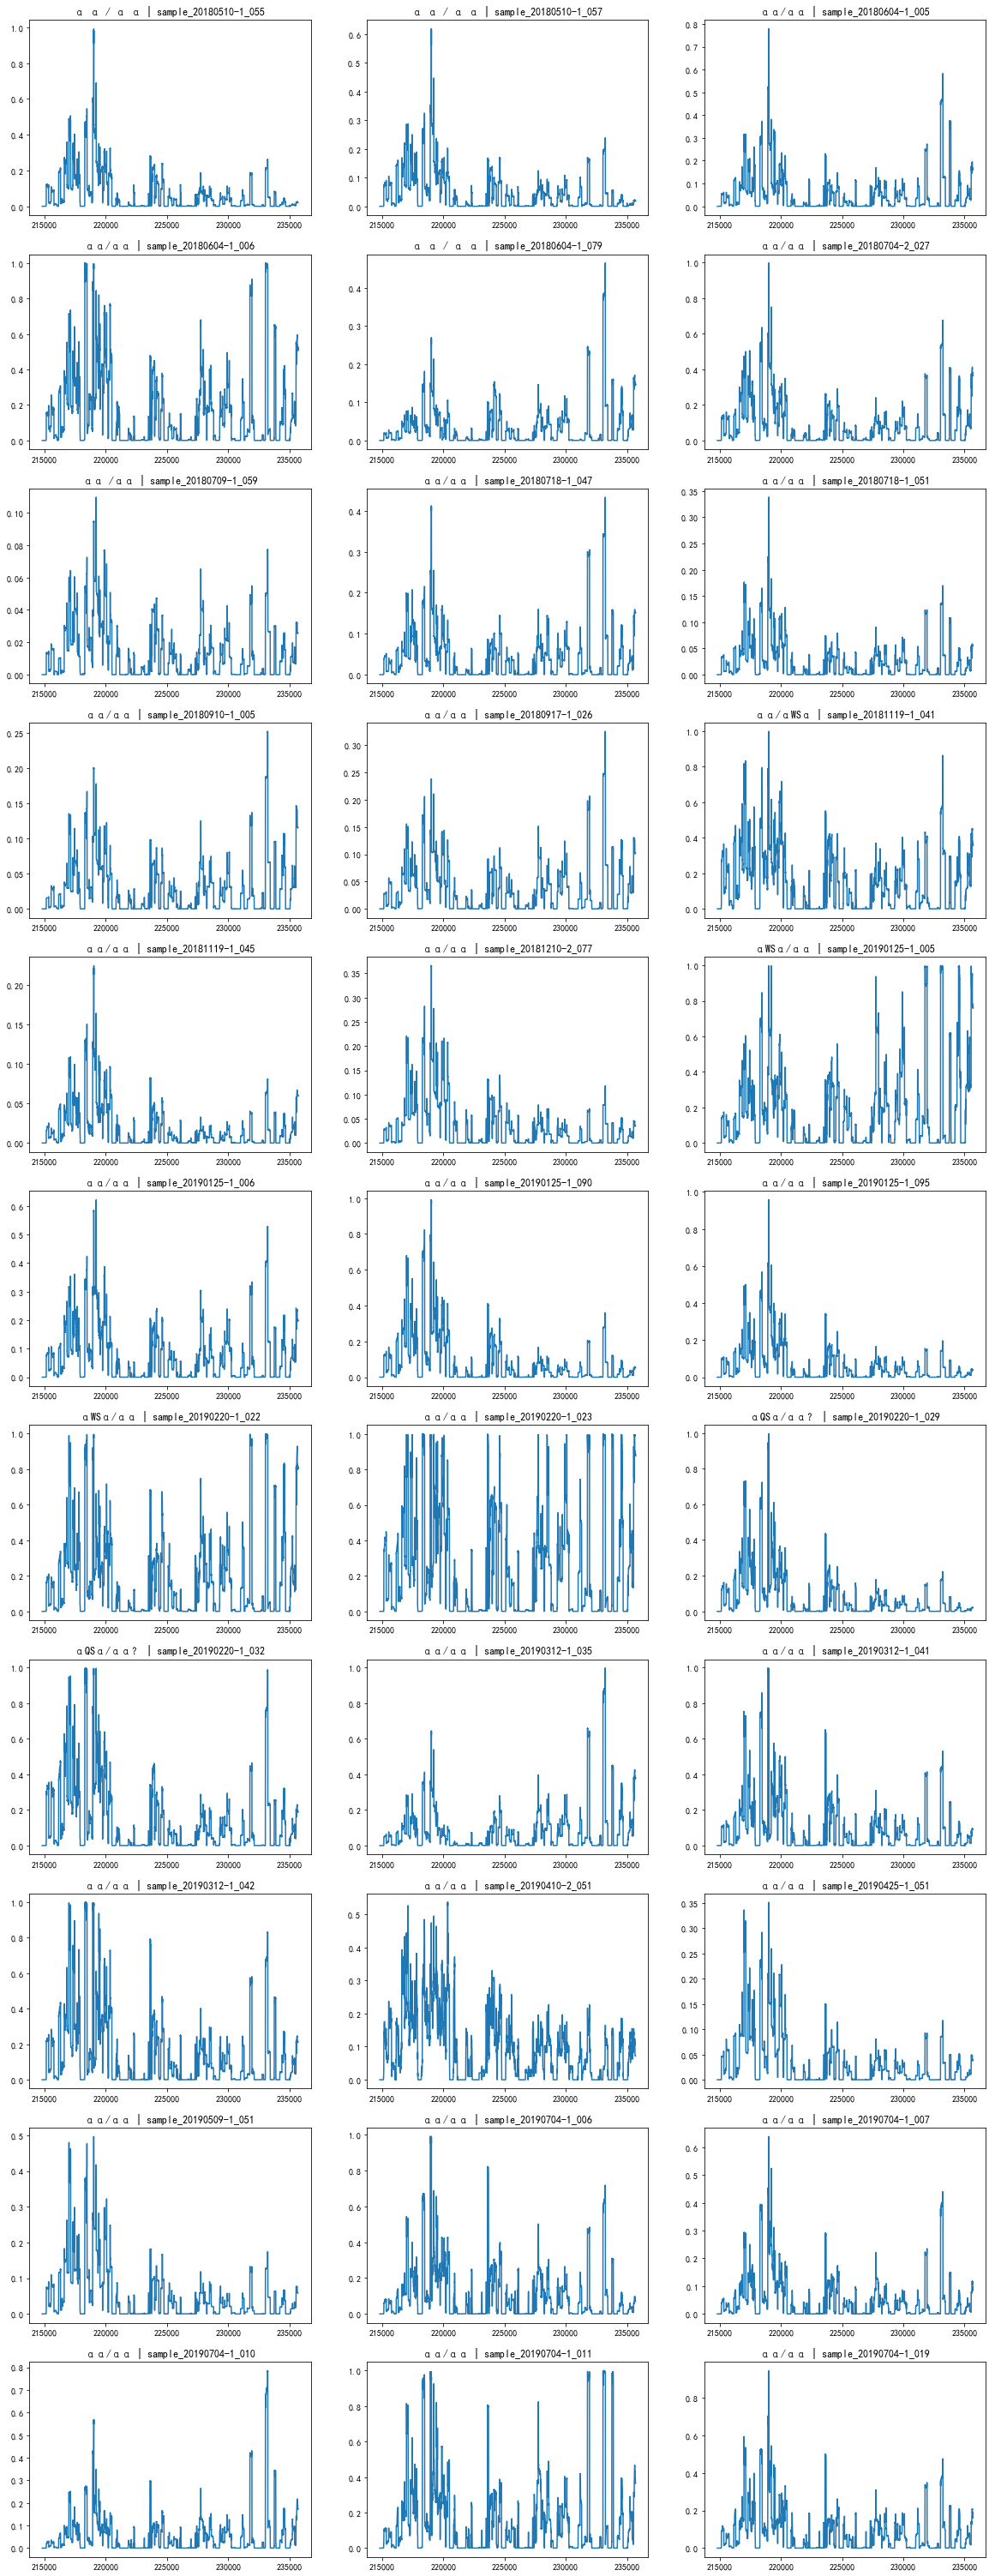

In [402]:
kind2_list = [ i for i in target_dict_num if target_dict_num[i] == 2]
plt.figure(figsize=(20,165))
total_num2 = len(kind2_list)  #33
every_line_num2 = 3
num2 = 1

for i in file_list:
#     '.\\20190117-1\\result-IonXpress_082_rawlib.bam.txt',
    dateX = i.split('\\')[1]
    barcodeExp = i.split('\\')[2]
    barcodeX = re.search(r'_(\d+)_',barcodeExp).groups()[0]
    
#     sampleX = pd.read_csv(i,sep='\t',header=None,names=['Position','deep'])
#     res_sample = change_row_col(sampleX,dateX,barcodeX).copy()
    sample_name = 'sample_%s_%s'%(dateX,barcodeX)
    if sample_name in kind2_list:
        sample = pd.read_csv(i,sep='\t',header=None,names=['Position','deep'])
        pgd_result = target_dict_pgd[sample_name]
        
        the_axes = plt.subplot(total_num2,every_line_num2,num2)
#         the_axes.plot(sample.iloc[143523:164424,]['Position'].values,(sample.iloc[143523:164424,]['deep'].values)/(sample.iloc[143523:164424,]['deep'].values.max()))
        the_axes.plot(sample.iloc[143523:164424,]['Position'].values,((sample['deep'].values)/(sample['deep'].values.max()))[143523:164424] )
#         the_axes.plot(sample.iloc[143523:164424,]['Position'].values,sample.iloc[143523:164424,]['deep'].values)
        the_axes.set_title('%s | %s'%(pgd_result,sample_name))
        num2 += 1
        
    else:
        continue
        
        
plt.savefig('kind2-sea-max.png')

In [310]:
# kind3_list = [ i for i in target_dict_num if target_dict_num[i] == 3]
# display(kind3_list,len(kind3_list))

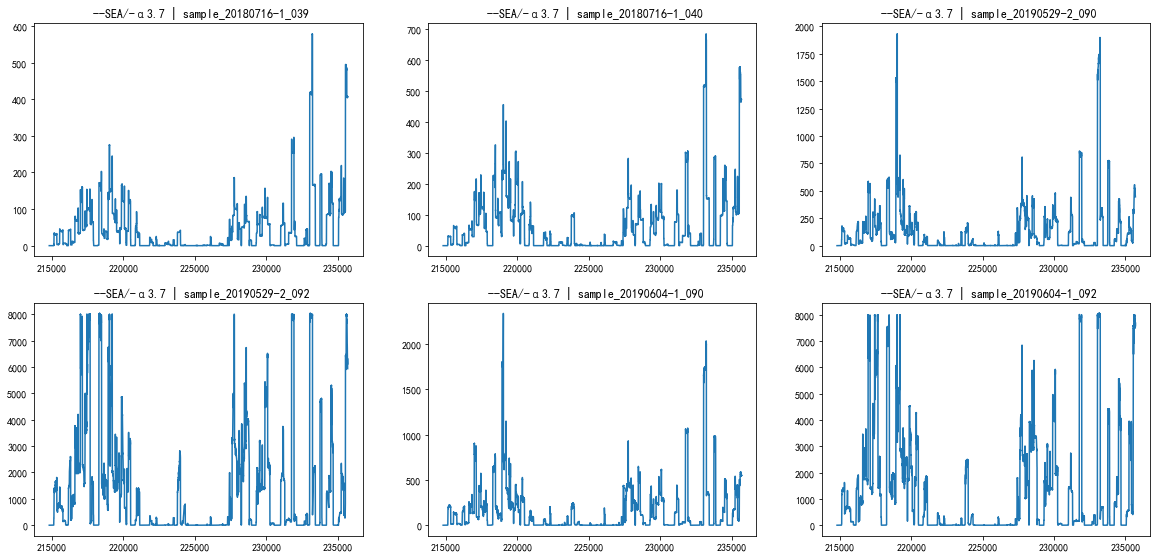

In [381]:
kind3_list = [ i for i in target_dict_num if target_dict_num[i] == 3]

plt.figure(figsize=(20,30))
total_num3 = len(kind3_list)   #6
every_line_num3 = 3
num3 = 1

for i in file_list:
#     '.\\20190117-1\\result-IonXpress_082_rawlib.bam.txt',
    dateX = i.split('\\')[1]
    barcodeExp = i.split('\\')[2]
    barcodeX = re.search(r'_(\d+)_',barcodeExp).groups()[0]
    
#     sampleX = pd.read_csv(i,sep='\t',header=None,names=['Position','deep'])
#     res_sample = change_row_col(sampleX,dateX,barcodeX).copy()
    sample_name = 'sample_%s_%s'%(dateX,barcodeX)
    if sample_name in kind3_list:
        sample = pd.read_csv(i,sep='\t',header=None,names=['Position','deep'])
        pgd_result = target_dict_pgd[sample_name]
        
        the_axes = plt.subplot(total_num3,every_line_num3,num3)
        the_axes.plot(sample.iloc[143523:164424,]['Position'].values,sample.iloc[143523:164424,]['deep'].values)
#         the_axes.plot(sample.iloc[143523:164424,]['Position'].values,(sample.iloc[143523:164424,]['deep'].values)/(sample.iloc[143523:164424,]['deep'].values.max()))
        the_axes.set_title('%s | %s'%(pgd_result,sample_name))
        num3 += 1
        
    else:
        continue
        
        
plt.savefig('kind3-sea.png')

In [320]:
# kind4_list = [ i for i in target_dict_num if target_dict_num[i] == 4]
# display(kind4_list,len(kind4_list))

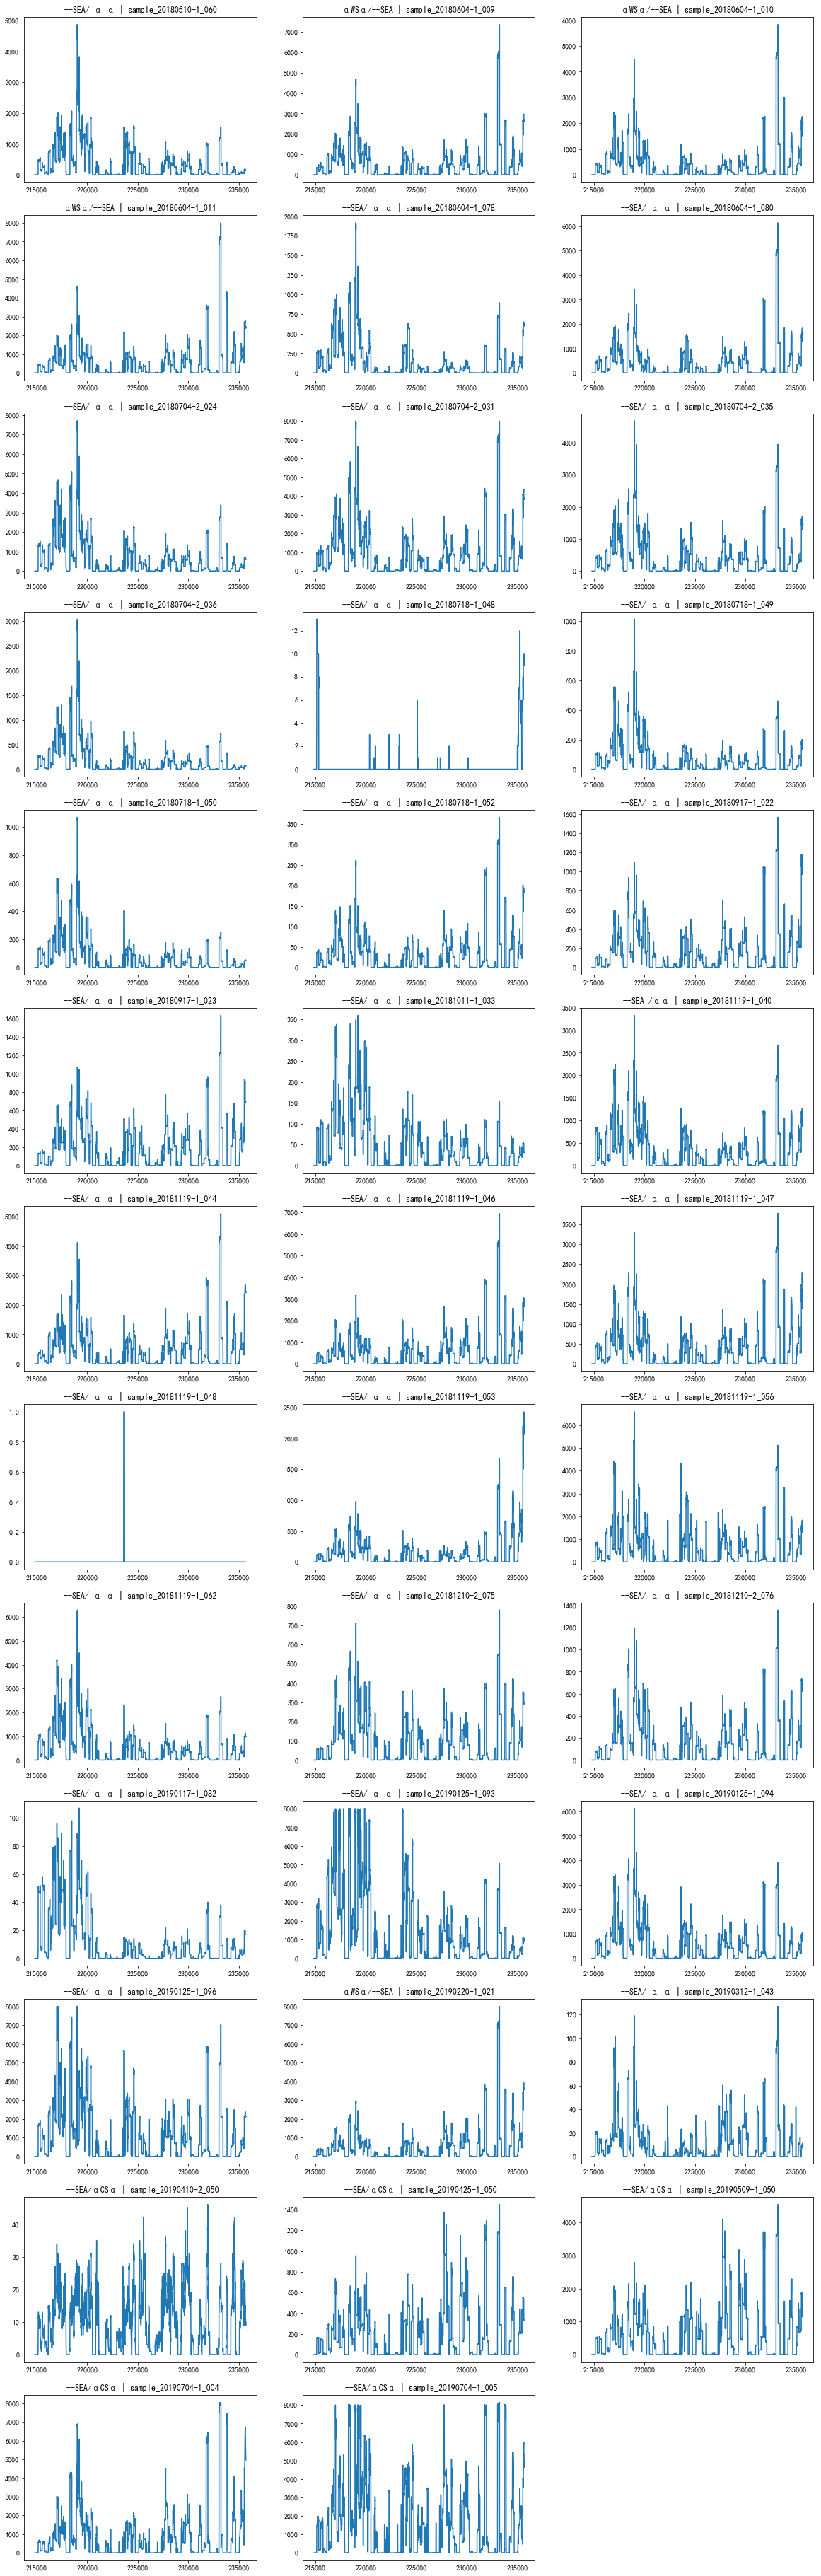

In [421]:
kind4_list = [ i for i in target_dict_num if target_dict_num[i] == 4]
plt.figure(figsize=(20,195))
total_num4 = len(kind4_list)  #38
every_line_num4 = 3
num4 = 1

for i in file_list:
#     '.\\20190117-1\\result-IonXpress_082_rawlib.bam.txt',
    dateX = i.split('\\')[1]
    barcodeExp = i.split('\\')[2]
    barcodeX = re.search(r'_(\d+)_',barcodeExp).groups()[0]
    
#     sampleX = pd.read_csv(i,sep='\t',header=None,names=['Position','deep'])
#     res_sample = change_row_col(sampleX,dateX,barcodeX).copy()
    sample_name = 'sample_%s_%s'%(dateX,barcodeX)
    if sample_name in kind4_list:
        sample = pd.read_csv(i,sep='\t',header=None,names=['Position','deep'])
        pgd_result = target_dict_pgd[sample_name]
        
        the_axes = plt.subplot(total_num4,every_line_num4,num4)
#         the_axes.plot(sample.iloc[143523:164424,]['Position'].values,sample.iloc[143523:164424,]['deep'].values)
        the_axes.plot(sample.iloc[143523:164424,]['Position'].values,sample.iloc[143523:164424,]['deep'].values)
        the_axes.set_title('%s | %s'%(pgd_result,sample_name))
        num4 += 1
        
    else:
        continue
        
        
plt.savefig('kind4-sea.png')

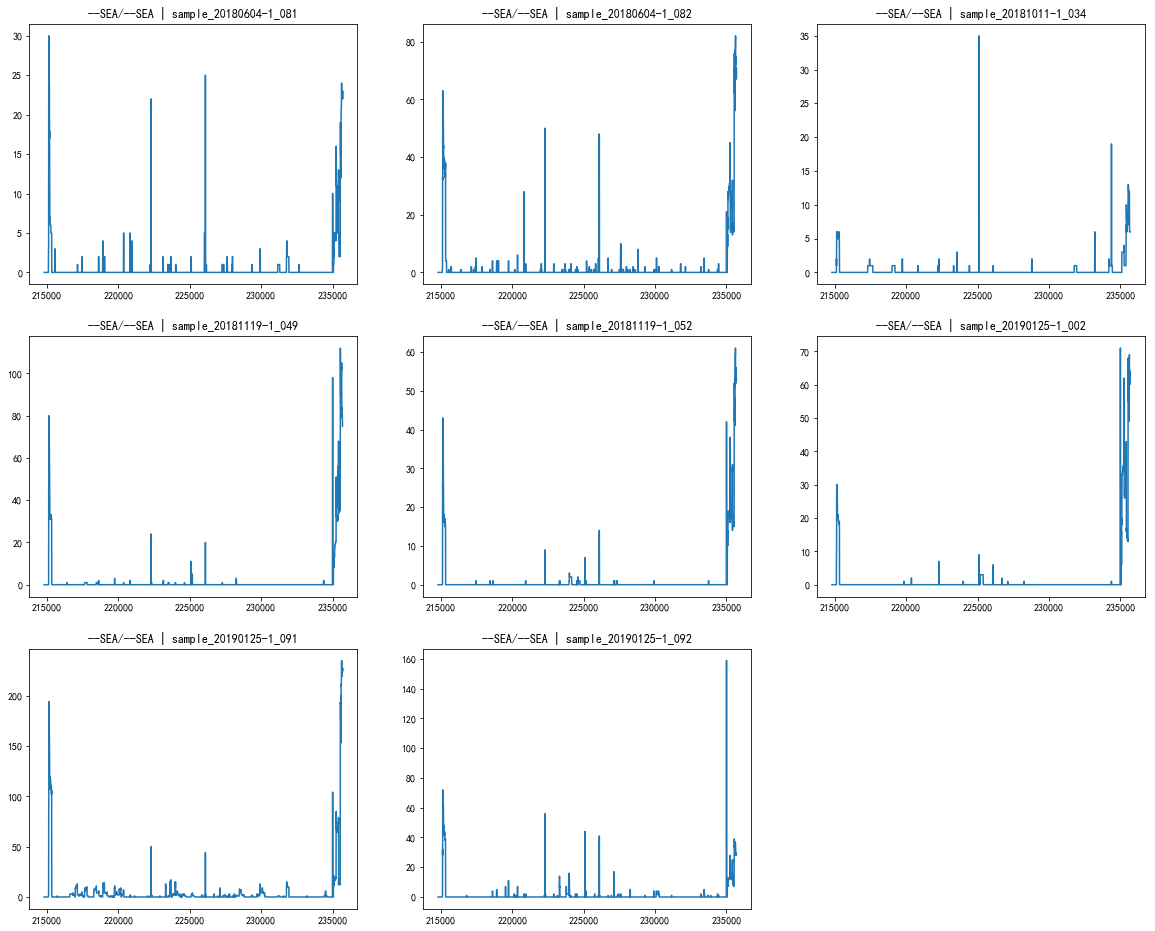

In [323]:
kind5_list = [ i for i in target_dict_num if target_dict_num[i] == 5]

plt.figure(figsize=(20,45))
total_num5 = len(kind5_list)   #8
every_line_num5 = 3
num5 = 1

for i in file_list:
#     '.\\20190117-1\\result-IonXpress_082_rawlib.bam.txt',
    dateX = i.split('\\')[1]
    barcodeExp = i.split('\\')[2]
    barcodeX = re.search(r'_(\d+)_',barcodeExp).groups()[0]
    
#     sampleX = pd.read_csv(i,sep='\t',header=None,names=['Position','deep'])
#     res_sample = change_row_col(sampleX,dateX,barcodeX).copy()
    sample_name = 'sample_%s_%s'%(dateX,barcodeX)
    if sample_name in kind5_list:
        sample = pd.read_csv(i,sep='\t',header=None,names=['Position','deep'])
        pgd_result = target_dict_pgd[sample_name]
        
        the_axes = plt.subplot(total_num5,every_line_num5,num5)
        the_axes.plot(sample.iloc[143523:164424,]['Position'].values,sample.iloc[143523:164424,]['deep'].values)
        the_axes.set_title('%s | %s'%(pgd_result,sample_name))
        num5 += 1
        
    else:
        continue
        
        
# plt.savefig('kind5.png')

In [317]:
kind6_list = [ i for i in target_dict_num if target_dict_num[i] == 6]
display(kind6_list,len(kind6_list))

['sample_20180730-1_090', 'sample_20181210-2_078']

2

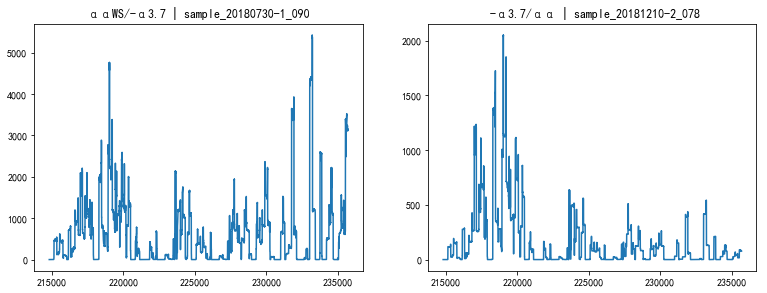

In [324]:
kind6_list = [ i for i in target_dict_num if target_dict_num[i] == 6]

plt.figure(figsize=(20,10))
total_num6 = len(kind6_list)   #2
every_line_num6 = 3
num6 = 1

for i in file_list:
#     '.\\20190117-1\\result-IonXpress_082_rawlib.bam.txt',
    dateX = i.split('\\')[1]
    barcodeExp = i.split('\\')[2]
    barcodeX = re.search(r'_(\d+)_',barcodeExp).groups()[0]
    
#     sampleX = pd.read_csv(i,sep='\t',header=None,names=['Position','deep'])
#     res_sample = change_row_col(sampleX,dateX,barcodeX).copy()
    sample_name = 'sample_%s_%s'%(dateX,barcodeX)
    if sample_name in kind6_list:
        sample = pd.read_csv(i,sep='\t',header=None,names=['Position','deep'])
        pgd_result = target_dict_pgd[sample_name]
        
        the_axes = plt.subplot(total_num6,every_line_num6,num6)
        the_axes.plot(sample.iloc[143523:164424,]['Position'].values,sample.iloc[143523:164424,]['deep'].values)
        the_axes.set_title('%s | %s'%(pgd_result,sample_name))
        num6 += 1
        
    else:
        continue
        
        
# plt.savefig('kind6.png')

In [318]:
# kind7_list = [ i for i in target_dict_num if target_dict_num[i] == 7]
# display(kind7_list,len(kind7_list))

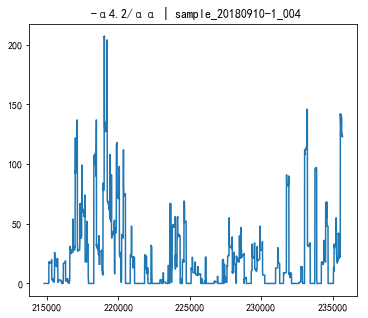

In [327]:
kind7_list = [ i for i in target_dict_num if target_dict_num[i] == 7]

plt.figure(figsize=(20,5))
total_num7 = len(kind7_list)  #1
every_line_num7 = 3
num7 = 1

for i in file_list:
#     '.\\20190117-1\\result-IonXpress_082_rawlib.bam.txt',
    dateX = i.split('\\')[1]
    barcodeExp = i.split('\\')[2]
    barcodeX = re.search(r'_(\d+)_',barcodeExp).groups()[0]
    
#     sampleX = pd.read_csv(i,sep='\t',header=None,names=['Position','deep'])
#     res_sample = change_row_col(sampleX,dateX,barcodeX).copy()
    sample_name = 'sample_%s_%s'%(dateX,barcodeX)
    if sample_name in kind7_list:
        sample = pd.read_csv(i,sep='\t',header=None,names=['Position','deep'])
        pgd_result = target_dict_pgd[sample_name]
        
        the_axes = plt.subplot(total_num7,every_line_num7,num7)
        the_axes.plot(sample.iloc[143523:164424,]['Position'].values,sample.iloc[143523:164424,]['deep'].values)
        the_axes.set_title('%s | %s'%(pgd_result,sample_name))
        num7 += 1
        
    else:
        continue
        
        
# plt.savefig('kind7.png')

In [101]:
# plt.figure(figsize=(20,180))
# total_num = 36
# every_line_num = 3
# num = 1

# for i in file_list:
# #     '.\\20190117-1\\result-IonXpress_082_rawlib.bam.txt',
#     dateX = i.split('\\')[1]
#     barcodeExp = i.split('\\')[2]
#     barcodeX = re.search(r'_(\d+)_',barcodeExp).groups()[0]
    
# #     sampleX = pd.read_csv(i,sep='\t',header=None,names=['Position','deep'])
# #     res_sample = change_row_col(sampleX,dateX,barcodeX).copy()
#     sample_name = 'sample_%s_%s'%(dateX,barcodeX)
#     if sample_name in kind1_list:
#         sample = pd.read_csv(i,sep='\t',header=None,names=['Position','deep'])
#         pgd_result = target_dict_pgd[sample_name]
        
#         the_axes = plt.subplot(total_num,every_line_num,num)
#         the_axes.plot(sample['Position'].values,sample['deep'].values)
#         the_axes.set_title('%s | %s'%(pgd_result,sample_name))
#         num += 1
        
#     else:
#         continue
        
        
# plt.savefig('kind1.png')

In [103]:
# kind2_list = [ i for i in target_dict_num if target_dict_num[i] == 2]
# kind2_list

In [104]:
# len(kind2_list)

In [105]:
# plt.figure(figsize=(20,195))
# total_num2 = 38
# every_line_num2 = 3
# num2 = 1

# for i in file_list:
# #     '.\\20190117-1\\result-IonXpress_082_rawlib.bam.txt',
#     dateX = i.split('\\')[1]
#     barcodeExp = i.split('\\')[2]
#     barcodeX = re.search(r'_(\d+)_',barcodeExp).groups()[0]
    
# #     sampleX = pd.read_csv(i,sep='\t',header=None,names=['Position','deep'])
# #     res_sample = change_row_col(sampleX,dateX,barcodeX).copy()
#     sample_name = 'sample_%s_%s'%(dateX,barcodeX)
#     if sample_name in kind2_list:
#         sample = pd.read_csv(i,sep='\t',header=None,names=['Position','deep'])
#         pgd_result = target_dict_pgd[sample_name]
        
#         the_axes = plt.subplot(total_num2,every_line_num2,num2)
#         the_axes.plot(sample['Position'].values,sample['deep'].values)
#         the_axes.set_title('%s | %s'%(pgd_result,sample_name))
#         num2 += 1
        
#     else:
#         continue
        
        
# plt.savefig('kind2.png')

In [106]:
# kind3_list = [ i for i in target_dict_num if target_dict_num[i] == 3]
# kind3_list

In [107]:
# len(kind3_list)

In [108]:
# plt.figure(figsize=(20,90))
# total_num3 = 18
# every_line_num3 = 3
# num3 = 1

# for i in file_list:
# #     '.\\20190117-1\\result-IonXpress_082_rawlib.bam.txt',
#     dateX = i.split('\\')[1]
#     barcodeExp = i.split('\\')[2]
#     barcodeX = re.search(r'_(\d+)_',barcodeExp).groups()[0]
    
# #     sampleX = pd.read_csv(i,sep='\t',header=None,names=['Position','deep'])
# #     res_sample = change_row_col(sampleX,dateX,barcodeX).copy()
#     sample_name = 'sample_%s_%s'%(dateX,barcodeX)
#     if sample_name in kind3_list:
#         sample = pd.read_csv(i,sep='\t',header=None,names=['Position','deep'])
#         pgd_result = target_dict_pgd[sample_name]
        
#         the_axes = plt.subplot(total_num3,every_line_num3,num3)
#         the_axes.plot(sample['Position'].values,sample['deep'].values)
#         the_axes.set_title('%s | %s'%(pgd_result,sample_name))
#         num3 += 1
        
#     else:
#         continue
        
# plt.savefig('kind3.png')